# Classificação de vinhos brancos e tintos


> Projeto final do módulo de estatística II do Data Science Degree da Let's Code.

*   Arthur Hahn
*   Douglas Alves


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [ ]:
# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

# 1. Análise Exploratória

## 1.1 Base de Dados Red

In [ ]:
df_red = pd.read_csv('./datasets/winequality-red.csv', delimiter=';')

In [ ]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_red.shape

(1599, 12)

In [ ]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 1.1.1 Verificando dados faltantes

In [ ]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Perceba que não existe dados faltantes para a base **red** e as features são quantitativas

### 1.1.2 Remoção de linhas duplicadas

In [ ]:
df_red.drop_duplicates(keep='first', inplace=True)
df_red.shape

(1359, 12)

In [ ]:
df_describe_red = df_red.describe().reset_index()
plot_labels = df_describe_red.columns.tolist()[1:]
print(f'Temos um total de {len(plot_labels)} atributos quantitativos. (Considerando atributo alvo - quality)')

Temos um total de 12 atributos quantitativos. (Considerando atributo alvo - quality)


### 1.1.3 Estatistica

Nessa seção iremos avaliar o range dos atributos, medidas de posição (média e mediana), medidades de dispersão (desvio-padrao e intervalo interquartil) e forma de distribuição (obliquidade e curtose). Após isso verificaremos a existência de outliers.

Do ponto de vista de analise multivariada será avaliado um heatmap avaliando correlação para verificarmos dependência e como o atributo quality se relaciona com os demais.

Por fim, será feita uma avaliação dos atributos quality visando obter proporções das classes e concluirmos se elas são balanceadas ou não. Para responder a questão de balanceamento realizaremos uma inferência estatística por meio de intervalo de confiança para diferença de proporções.

In [ ]:
dict_c = {0: '#003f5c', 1: '#444e86', 2: '#955196', 3: '#dd5182', 4: '#ff6e54', 5: '#ffa600'}

In [ ]:
n_cols = 3
n_linhas = 4
pos_coluna = [i for i in range(0,n_cols)] * n_linhas
pos_linha = [i//n_cols for i in range(0,df_red.shape[1])]

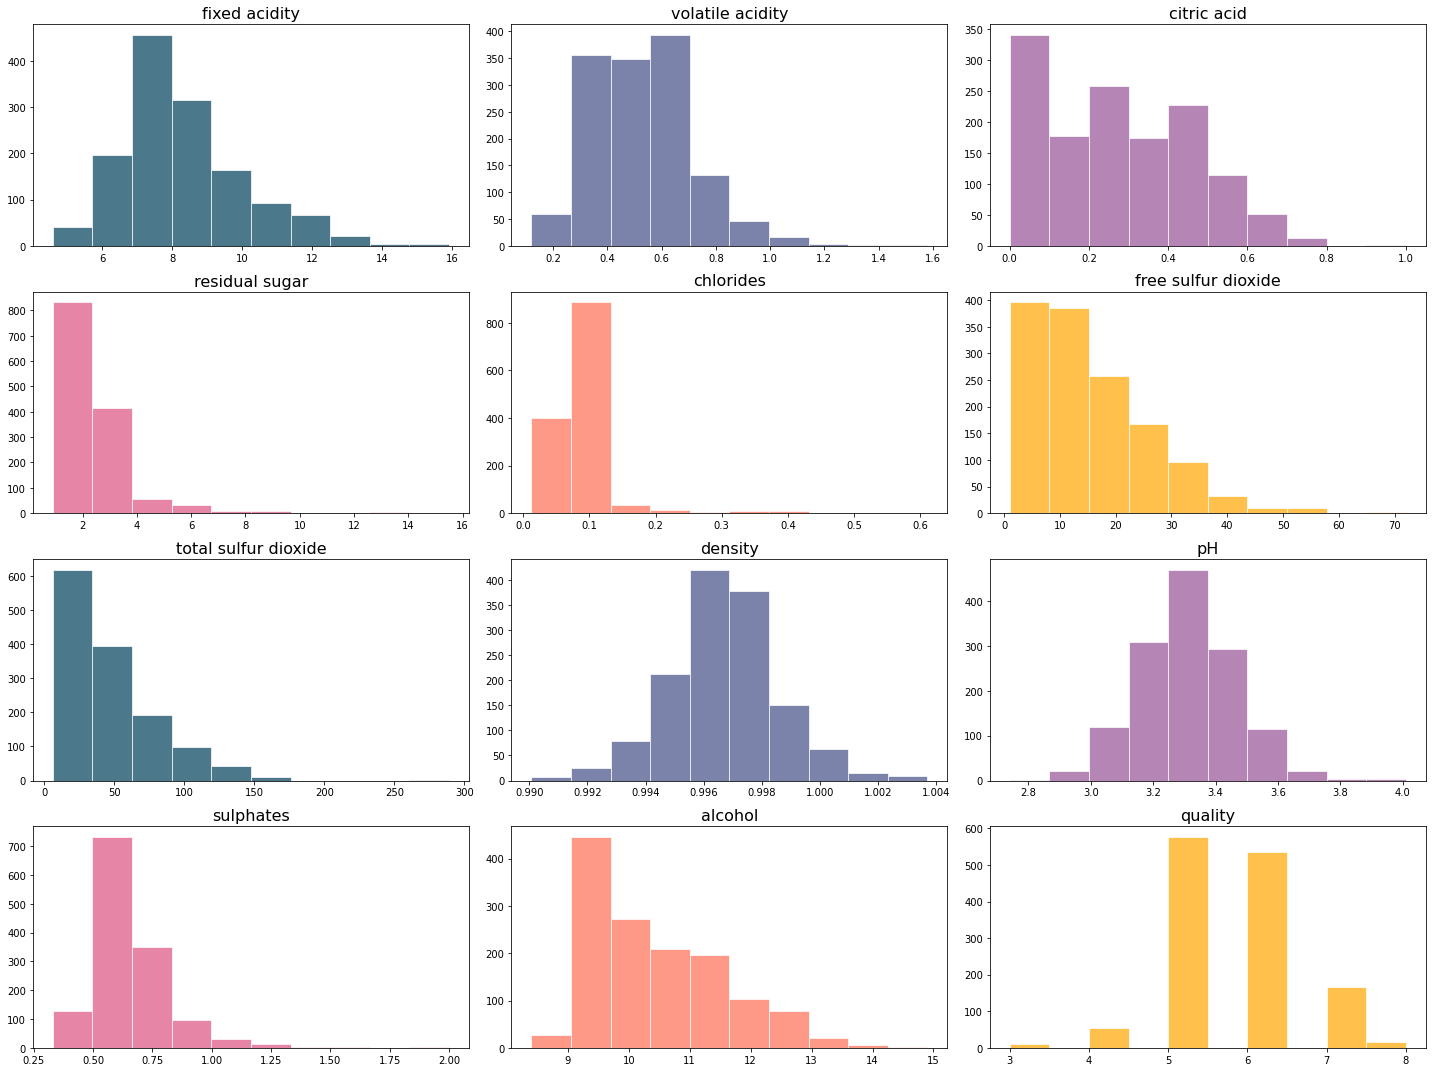

In [ ]:
fig, ax = plt.subplots(n_linhas, n_cols, figsize=(20, 15))
for i, label_id in enumerate(plot_labels):
    pal = sns.color_palette("magma")
    #sns.palplot(pal)
    ax[pos_linha[i], pos_coluna[i]].hist(x=label_id, data=df_red, color=dict_c[i%6], alpha=.7, edgecolor='white')
    ax[pos_linha[i], pos_coluna[i]].set_title(label_id, size=16)
    #ax.hist(x='Age', data=df_male, bins=15, color='blue', alpha=.7, edgecolor='white', label='Masculinos')
plt.tight_layout()
#plt.savefig('histograma_matplotlib.png')

Avaliando os histogramas percebemos que o atributo **densidade** e **pH** são simétricos e todos os demais possuem assimetria (skewness > 0). A seguir podemos verificar os dados descritivos

In [ ]:
df_red.iloc[1]

fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
quality                  5.0000
Name: 1, dtype: float64

In [ ]:
data_descritiva_red = {
    'Max': [np.round(df_red[i].max(), 2) for i in plot_labels],
    'Min': [np.round(df_red[i].min(), 2) for i in plot_labels],
    'Intervalo': [np.round(df_red[i].max() - df_red[i].min(), 2) for i in plot_labels],
    'Média': [np.round(df_red[i].mean(), 2) for i in plot_labels],
    'Médiana': [np.round(df_red[i].median(), 2) for i in plot_labels],
    'Desvio Padrão': [np.round(df_red[i].std(), 2) for i in plot_labels],
    'Intervalo Interquartil': [np.round(df_red[i].quantile(0.75) - df_red[i].quantile(0.25), 2) for i in plot_labels],
    'Obliquidade': [np.round(df_red[i].skew(), 2) for i in plot_labels],
    'Curtose': [np.round(df_red[i].kurt(), 2) for i in plot_labels]
    }
df_descritiva_red = pd.DataFrame(data_descritiva_red, index = plot_labels)
df_descritiva_red

,Max,Min,Intervalo,Média,Médiana,Desvio Padrão,Intervalo Interquartil,Obliquidade,Curtose
fixed acidity,15.90,4.60,11.30,8.31,7.90,1.74,2.10,0.94,1.05
volatile acidity,1.58,0.12,1.46,0.53,0.52,0.18,0.25,0.73,1.25
citric acid,1.00,0.00,1.00,0.27,0.26,0.20,0.34,0.31,-0.79
residual sugar,15.50,0.90,14.60,2.52,2.20,1.35,0.70,4.55,29.36
chlorides,0.61,0.01,0.60,0.09,0.08,0.05,0.02,5.50,38.62
free sulfur dioxide,72.00,1.00,71.00,15.89,14.00,10.45,14.00,1.23,1.89
total sulfur dioxide,289.00,6.00,283.00,46.83,38.00,33.41,41.00,1.54,4.04
density,1.00,0.99,0.01,1.00,1.00,0.00,0.00,0.04,0.83
pH,4.01,2.74,1.27,3.31,3.31,0.16,0.19,0.23,0.88
sulphates,2.00,0.33,1.67,0.66,0.62,0.17,0.18,2.41,11.10


Avaliando a Tabela acima percebe-se que existe uma diferença significativa na **escala** dos atributos, sendo **total sulfur dioxide** o maior range e **densidade** o menor.

Quanto a dispersão, percebemos que **residual sugar**, **free sulfur dioxide** e **total sulfur dioxide** possuem desvio-padrão elevados quando comparados com a média

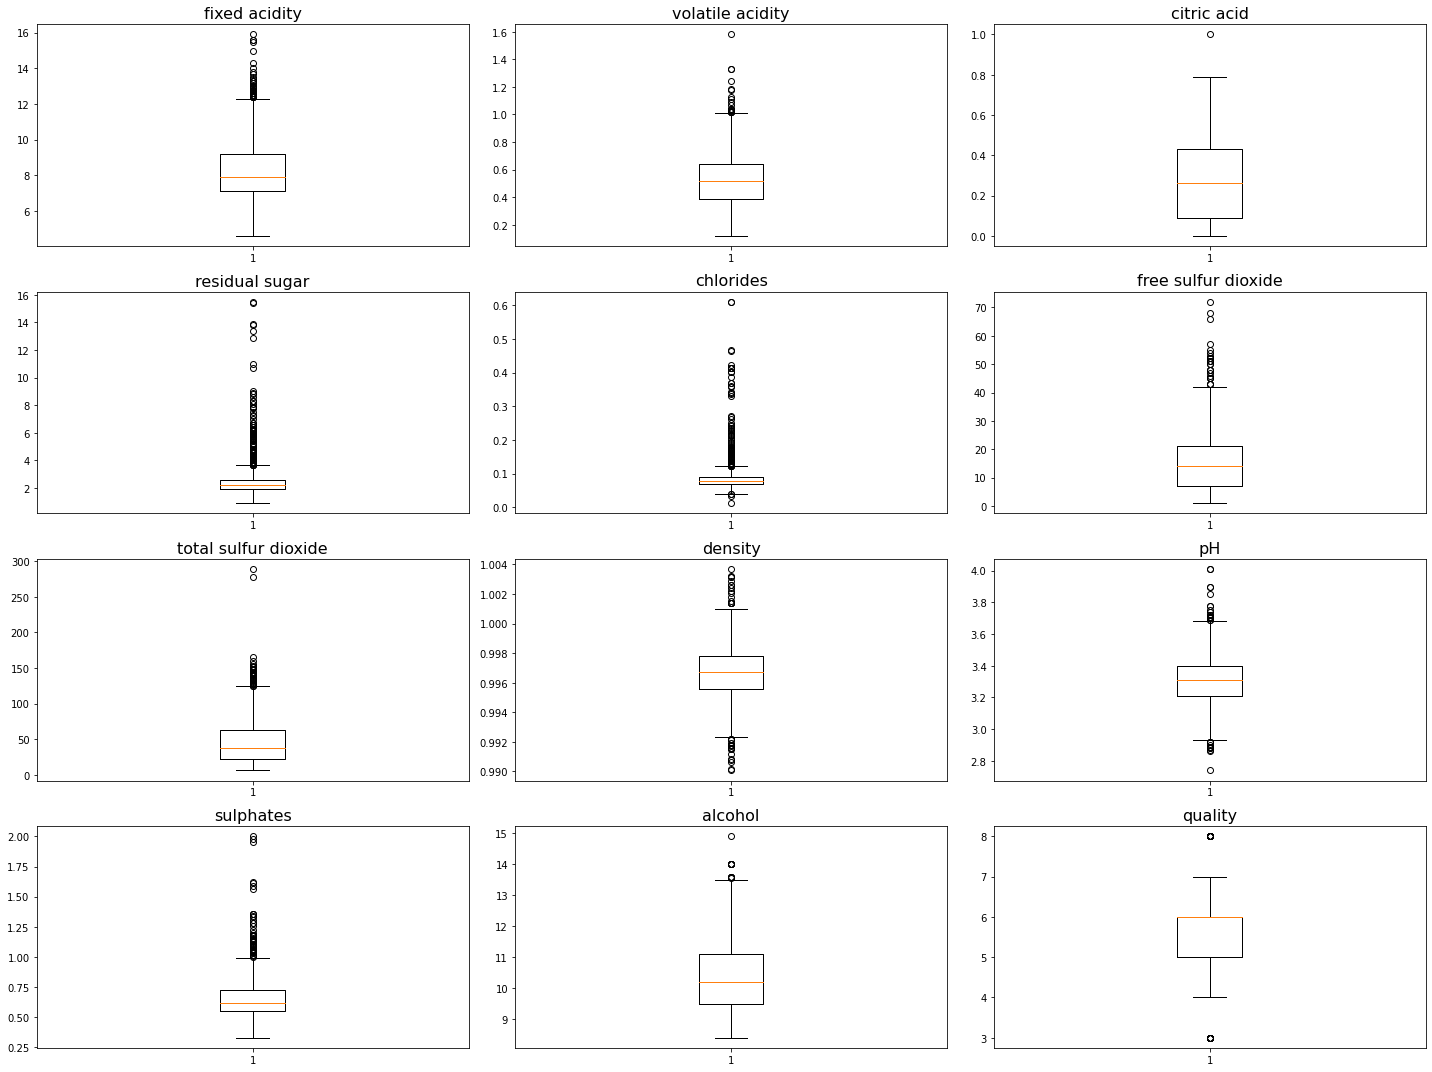

In [ ]:
fig, ax = plt.subplots(n_linhas, n_cols, figsize=(20, 15))
for i, label_id in enumerate(plot_labels):
    pal = sns.color_palette("magma")
    #sns.palplot(pal)
    ax[pos_linha[i], pos_coluna[i]].boxplot(x=label_id, data=df_red)
    ax[pos_linha[i], pos_coluna[i]].set_title(label_id, size=16)
    #ax.hist(x='Age', data=df_male, bins=15, color='blue', alpha=.7, edgecolor='white', label='Masculinos')
plt.tight_layout()
#plt.savefig('histograma_matplotlib.png')

Text(0.5, 1.0, 'Mapa de Calor - Correlação')

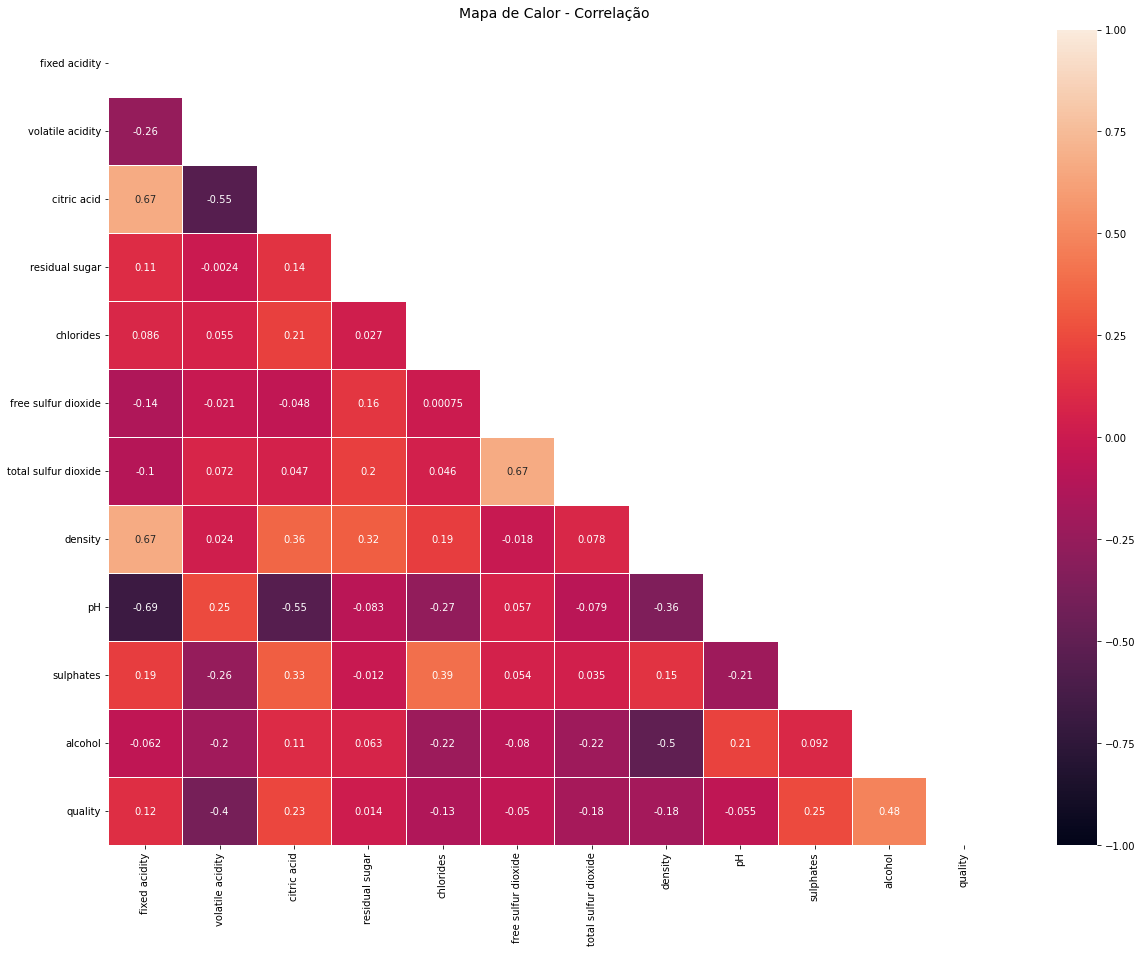

In [ ]:
corr= df_red.corr()
matrix = np.triu(corr)
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(df_red.corr(), vmin=-1, vmax=1, annot=True, mask=matrix, linewidths=1, linecolor='white')
heatmap.set_title('Mapa de Calor - Correlação', fontdict={'fontsize':14}, pad=12)
#plt.savefig('heatmap.png')

Verificamos uma correlação positiva entre:
* fixed acidity e density / citric acid
* free sulfur dioxide e total sulfur dioxide 
* alcohol e quality

Verificamos uma correlação negativa entre:
* fixed acidity E pH
* volatile acidity e citric acid
* citric acid e pH
* density e alcohol

### 1.1.4 Avaliação do atributo alvo 

Agora, iremos avaliar o atributo alvo (**quality**) para verificar a proporção das classes.

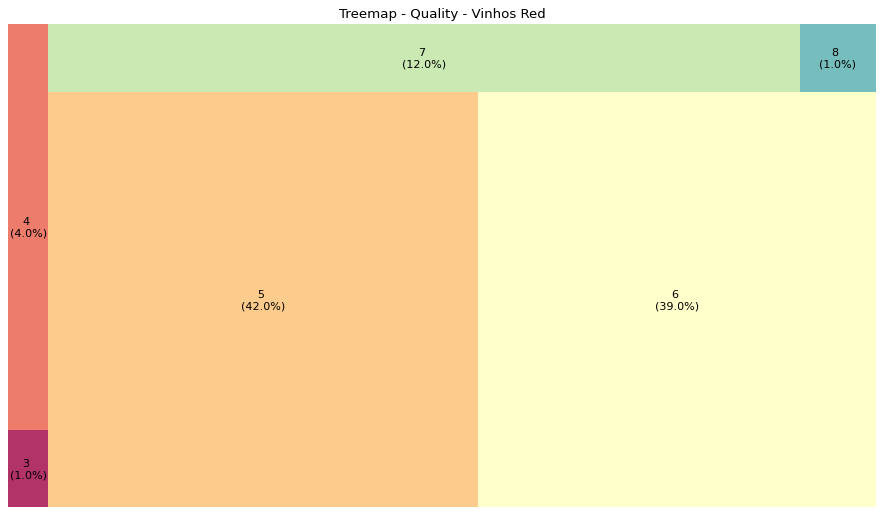

In [ ]:
df_count_red = df_red.groupby(by='quality').size().reset_index(name='counts')
sizes = df_count_red['counts'].values.tolist()
labels = df_count_red.apply(lambda x: str(x[0]) + " \n(" + str(np.round(100 * x[1] / df_count_red['counts'].sum(), 0)) + "%)", axis=1)
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

#draw plot
plt.figure(figsize=(14,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap - Quality - Vinhos Red')
plt.axis('off')
plt.show()

Note que as classes 1, 2, 9 e 10 (notas extremas) não aparecem na base de dados.

Por fim, iremos considerar que valor de **quality** >=6 representa um vinho de qualidade boa.

In [ ]:
df_red['label'] = np.where(df_red['quality'] >= 6, 'bom', 'ruim')

In [ ]:
colors_list = ['#ff6e54', '#955196', '#ffa600', '#003f5c', '#444e86']
df_label_red = df_red.groupby(['label'],as_index=False)['label'].value_counts()

fig, ax = plt.subplots(figsize=(15,5))
ax.pie(x='count', data=df_label_red, labels='label', autopct='%.2f%%', colors=colors_list, textprops={"fontsize":16})
ax.set_title('Proporção de Rótulos de qualidade', size=16)

plt.tight_layout()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [ ]:
df_label_red['prop'] = df_label_red['count'] / df_label_red['count'].sum()
df_label_red

NameError: name 'df_label_red' is not defined

### 1.1.4.1 Intervalo de Confiança - Diferença entre proporções

Para essa análise será consideranção indice de confiança de 95%. Pela quantidade de dados as hipoteses de normalidade podem ser utilizadas

In [ ]:
p_bom, n_bom = df_label_red.iloc[0, 2], df_label_red.iloc[0, 1]
p_ruim, n_ruim = df_label_red.iloc[1, 2], df_label_red.iloc[1, 1]
best_estimate = p_bom - p_ruim
standard_error = np.sqrt((p_bom * (1 - p_bom)) / n_bom + (p_ruim * (1 - p_ruim)) / n_ruim) 
z_star = 1.96
interval_length = z_star * standard_error 
IC_min, IC_max = best_estimate - interval_length, best_estimate + interval_length
print(f'O intervalo de confiança de 95% para o rótulo de qualidade é ({np.round(IC_min, 3)}, {np.round(IC_max, 3)}) ')

NameError: name 'df_label_red' is not defined

Como o intervalo de confiança contem o **0** (por uma questão de tolerância), para esse conjunto de dados, podemos inferir que as proporções de bom e ruim são iguais o que permite dizer que as classes são balanceadas.

## 1.2 Base de Dados White

In [ ]:
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

In [ ]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df_white.shape

(4898, 12)

In [ ]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Perceba que não existe dados faltantes para a base **white** e as features são quantitativas

### 1.2.1 Verificando dados faltantes

In [ ]:
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 1.2.2 Remoção de linhas duplicadas

In [ ]:
df_white.drop_duplicates(keep='first', inplace=True)
df_white.shape

(3961, 12)

### 1.2.3 Estatistica

Nessa seção iremos avaliar o range dos atributos, medidas de posição (média e mediana), medidades de dispersão (desvio-padrao e intervalo interquartil) e forma de distribuição (obliquidade e curtose). Após isso verificaremos a existência de outliers.

Do ponto de vista de analise multivariada será avaliado um heatmap avaliando correlação para verificarmos dependência e como o atributo quality se relaciona com os demais.

Por fim, será feita uma avaliação dos atributos quality visando obter proporções das classes e concluirmos se elas são balanceadas ou não. Para responder a questão de balanceamento realizaremos uma inferência estatística por meio de intervalo de confiança para diferença de proporções.

In [ ]:
df_describe_white = df_white.describe().reset_index()
plot_labels = df_describe_white.columns.tolist()[1:]
print(f'Temos um total de {len(plot_labels)} atributos quantitativos. (Considerando o atributo alvo - quality)')

Temos um total de 12 atributos quantitativos. (Considerando o atributo alvo - quality)


In [ ]:
dict_c = {0: '#003f5c', 1: '#444e86', 2: '#955196', 3: '#dd5182', 4: '#ff6e54', 5: '#ffa600'}

In [ ]:
n_cols = 3
n_linhas = 4
pos_coluna = [i for i in range(0,n_cols)] * n_linhas
pos_linha = [i//n_cols for i in range(0,df_white.shape[1])]

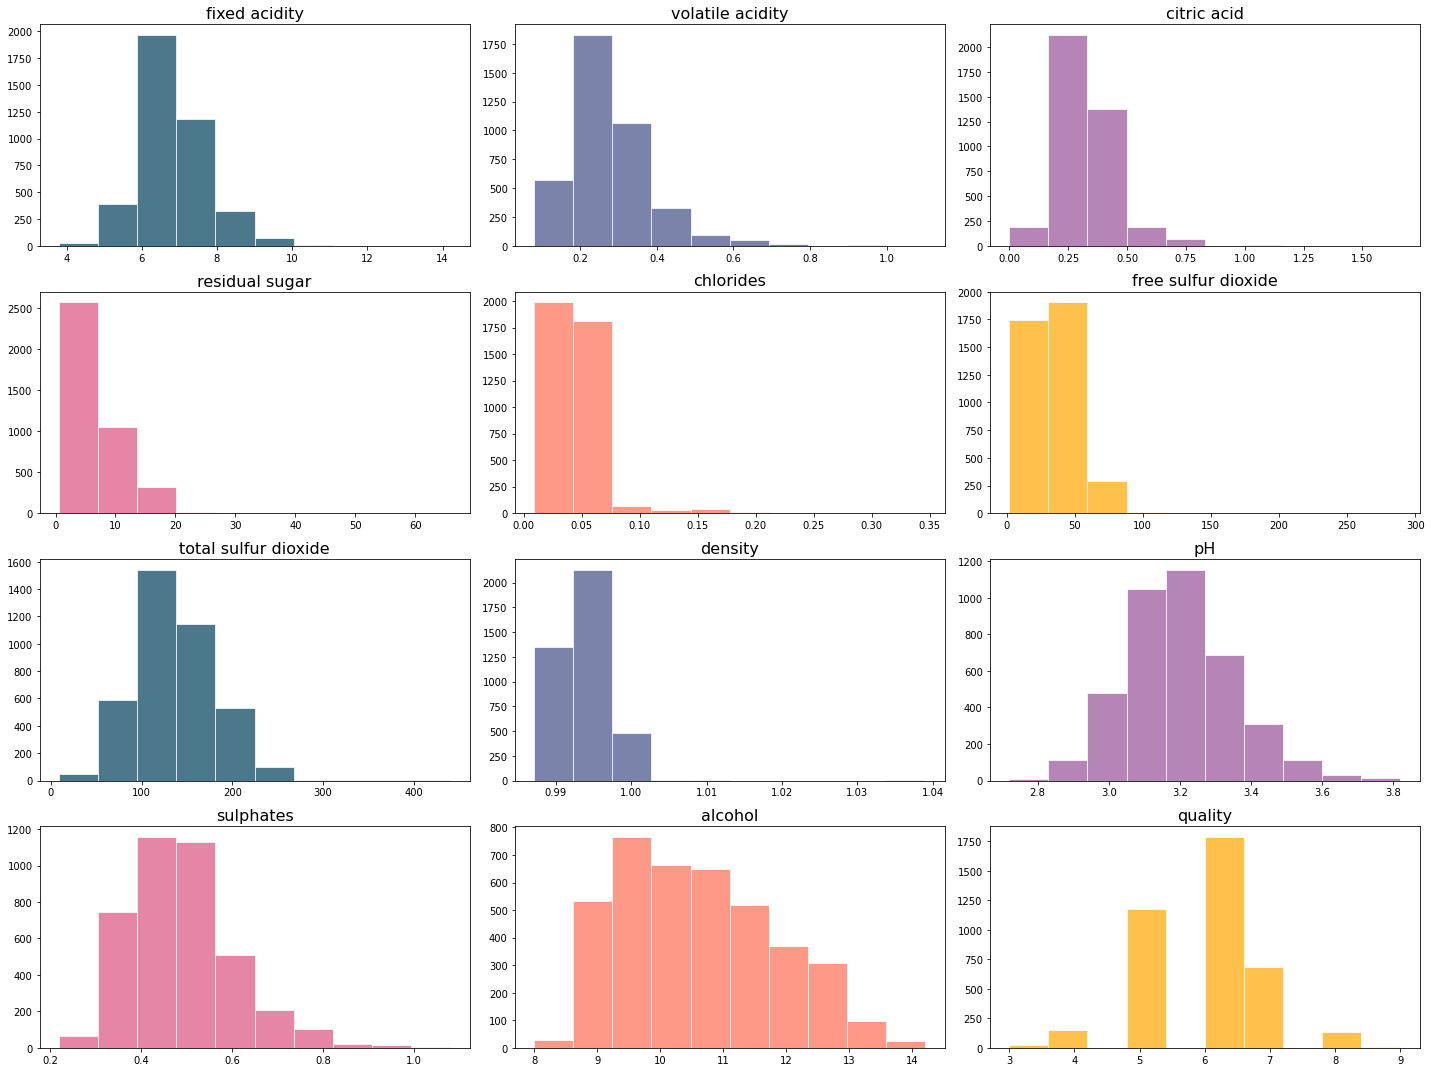

In [ ]:
fig, ax = plt.subplots(n_linhas, n_cols, figsize=(20, 15))
for i, label_id in enumerate(plot_labels):
    pal = sns.color_palette("magma")
    #sns.palplot(pal)
    ax[pos_linha[i], pos_coluna[i]].hist(x=label_id, data=df_white, color=dict_c[i%6], alpha=.7, edgecolor='white')
    ax[pos_linha[i], pos_coluna[i]].set_title(label_id, size=16)
    #ax.hist(x='Age', data=df_male, bins=15, color='blue', alpha=.7, edgecolor='white', label='Masculinos')
plt.tight_layout()
#plt.savefig('histograma_matplotlib.png')

Avaliando os histogramas percebemos que o atributo **pH** é simétricos e todos os demais possuem assimetria (skewness > 0) mas não são muito obliquos, com excessao do **chlorides**. A seguir podemos verificar os dados descritivos.

Diferente da base red, o atributo **densidade** não é simetrico pra a base white.

Também verificamos um indício de simetria em **total sulfur dioxide**.

In [ ]:
data_descritiva_white = {
    'Max': [np.round(df_white[i].max(), 2) for i in plot_labels],
    'Min': [np.round(df_white[i].min(), 2) for i in plot_labels],
    'Intervalo': [np.round(df_white[i].max() - df_white[i].min(), 2) for i in plot_labels],
    'Média': [np.round(df_white[i].mean(), 2) for i in plot_labels],
    'Médiana': [np.round(df_white[i].median(), 2) for i in plot_labels],
    'Desvio Padrão': [np.round(df_white[i].std(), 2) for i in plot_labels],
    'Obliquidade': [np.round(df_white[i].skew(), 2) for i in plot_labels],
    'Curtose': [np.round(df_white[i].kurt(), 2) for i in plot_labels],
    'Intervalo Interquartil': [np.round(df_white[i].quantile(0.75) - df_white[i].quantile(0.25), 2) for i in plot_labels],
    }
df_descritiva_white = pd.DataFrame(data_descritiva_white, index = plot_labels)
df_descritiva_white

,Max,Min,Intervalo,Média,Médiana,Desvio Padrão,Obliquidade,Curtose,Intervalo Interquartil
fixed acidity,14.20,3.80,10.40,6.84,6.80,0.87,0.70,2.25,1.00
volatile acidity,1.10,0.08,1.02,0.28,0.26,0.10,1.64,5.33,0.12
citric acid,1.66,0.00,1.66,0.33,0.32,0.12,1.31,6.84,0.12
residual sugar,65.80,0.60,65.20,5.91,4.70,4.86,1.33,5.68,7.30
chlorides,0.35,0.01,0.34,0.05,0.04,0.02,4.97,35.53,0.02
free sulfur dioxide,289.00,2.00,287.00,34.89,33.00,17.21,1.57,13.43,22.00
total sulfur dioxide,440.00,9.00,431.00,137.19,133.00,43.13,0.46,0.74,60.00
density,1.04,0.99,0.05,0.99,0.99,0.00,1.27,14.18,0.00
pH,3.82,2.72,1.10,3.20,3.18,0.15,0.46,0.55,0.20
sulphates,1.08,0.22,0.86,0.49,0.48,0.11,0.94,1.57,0.14


Avaliando a Tabela acima percebemos que existe uma diferença significativa na **escala** dos atributos, sendo **total sulfur dioxide** o maior range e **densidade** o menor. Mesmo comportamento da base red.

Quanto a dispersão, percebemos que **residual sugar**, **free sulfur dioxide** e **total sulfur dioxide** possuem desvio-padrão elevados quando comparados com a média

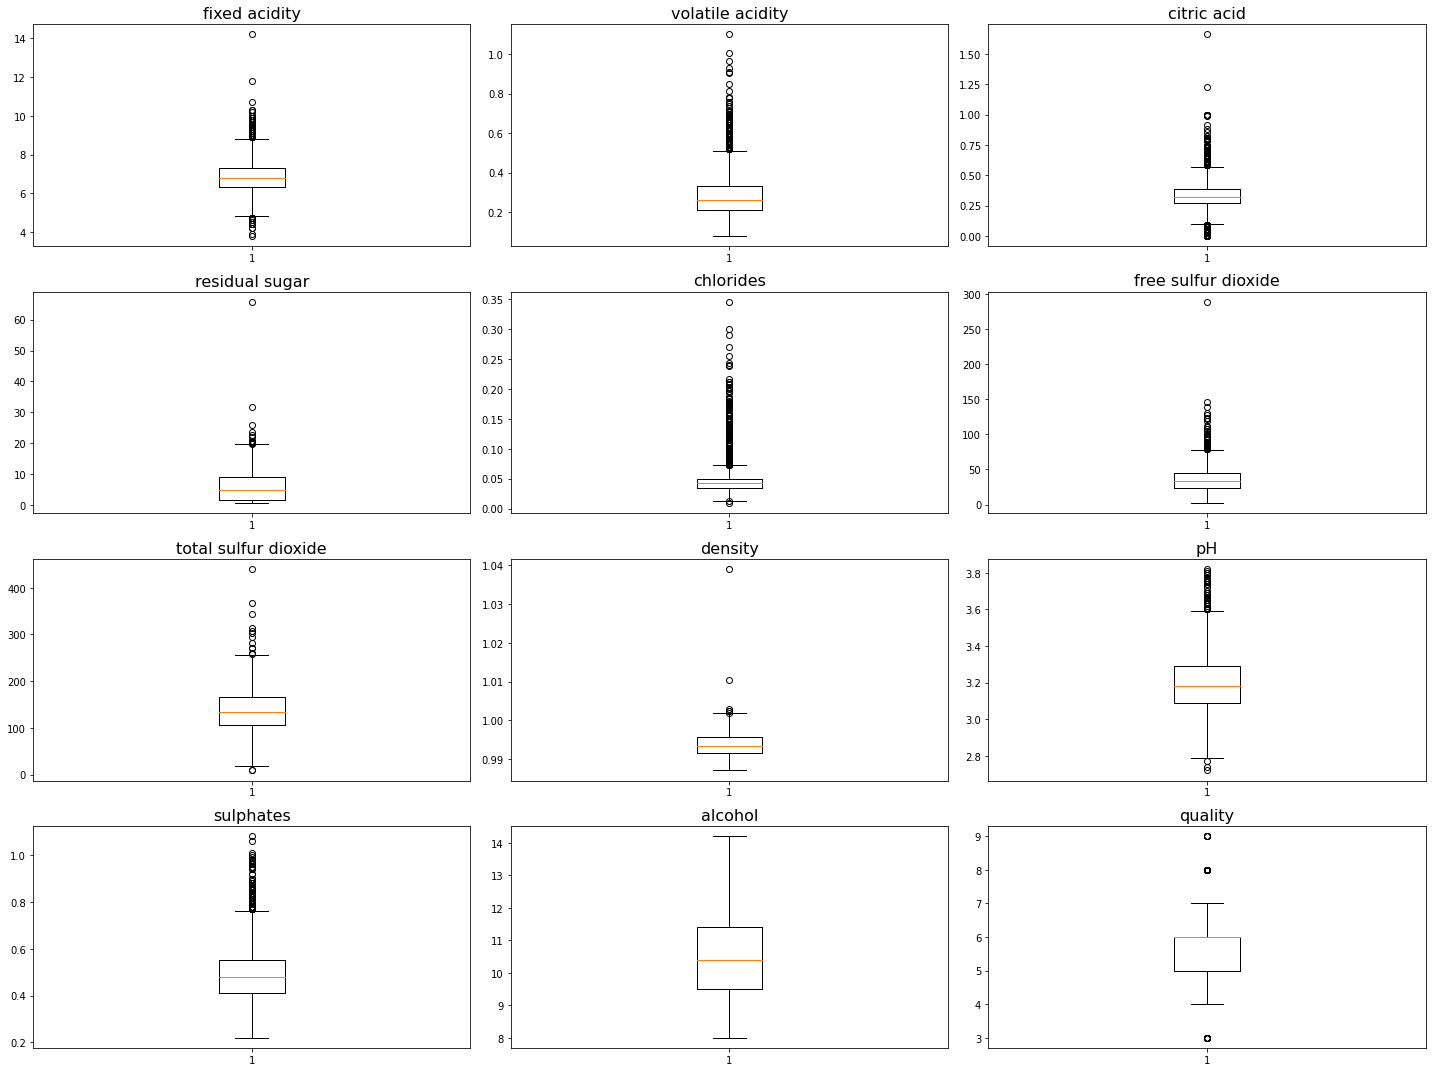

In [ ]:
fig, ax = plt.subplots(n_linhas, n_cols, figsize=(20, 15))
for i, label_id in enumerate(plot_labels):
    pal = sns.color_palette("magma")
    #sns.palplot(pal)
    ax[pos_linha[i], pos_coluna[i]].boxplot(x=label_id, data=df_white)
    ax[pos_linha[i], pos_coluna[i]].set_title(label_id, size=16)
    #ax.hist(x='Age', data=df_male, bins=15, color='blue', alpha=.7, edgecolor='white', label='Masculinos')
plt.tight_layout()
#plt.savefig('histograma_matplotlib.png')

Text(0.5, 1.0, 'Mapa de Calor - Correlação')

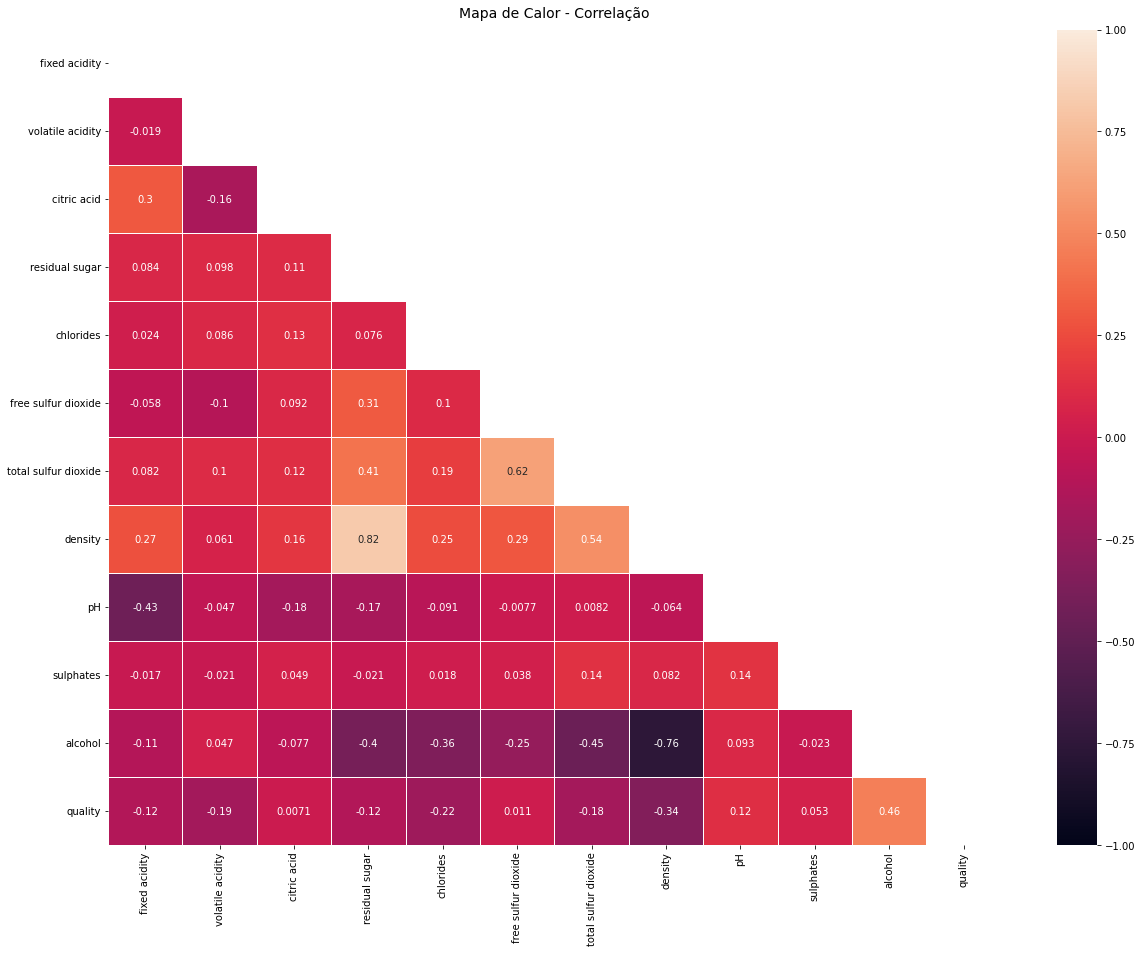

In [ ]:
corr= df_white.corr()
matrix = np.triu(corr)
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(df_white.corr(), vmin=-1, vmax=1, annot=True, mask=matrix, linewidths=1, linecolor='white')
heatmap.set_title('Mapa de Calor - Correlação', fontdict={'fontsize':14}, pad=12)
#plt.savefig('heatmap.png')

Verificamos uma correlação positiva entre:
* residual sugar e density
* free sulfur dioxide e total sulfur dioxide
* total sulfur dioxide e density
* alcohol e quality

Verificamos uma correlação negativa entre:
* density e alcohol

### 1.2.4 Avaliação do atributo alvo 

Agora, iremos avaliar o atributo alvo (**quality**) para verificar a proporção das classes.

In [ ]:
df_white.groupby(by='quality').size().reset_index(name='counts')

,quality,counts
0,3,20
1,4,153
2,5,1175
3,6,1788
4,7,689
5,8,131
6,9,5


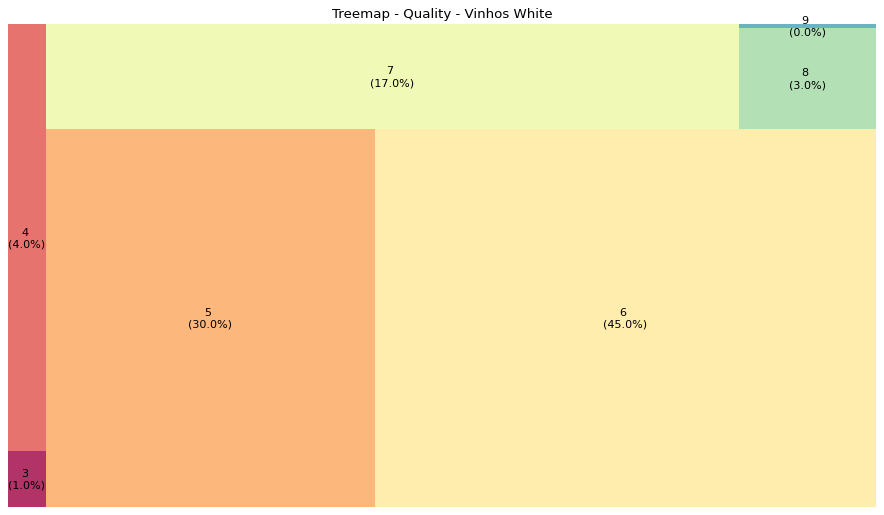

In [ ]:
df_count_white = df_white.groupby(by='quality').size().reset_index(name='counts')
sizes = df_count_white['counts'].values.tolist()
labels = df_count_white.apply(lambda x: str(x[0]) + " \n(" + str(np.round(100 * x[1] / df_count_white['counts'].sum(), 0)) + "%)", axis=1)
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

#draw plot
plt.figure(figsize=(14,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap - Quality - Vinhos White')
plt.axis('off')
plt.show()

In [ ]:
print(f'Os rórutlos 3 e 9 aparecem como 0% porque possuim poucos registros classificados como tais ({df_count_white.iloc[0, 1]} e {df_count_white.iloc[6, 1]}, respectivamente)')

Os rórutlos 3 e 9 aparecem como 0% porque possuim poucos registros classificados como tais (20 e 5, respectivamente)


Note que as classes 1, 2 e 10 não aparecem na base de dados.

Por fim, iremos considerar que valor de **quality** >=6 representa um vinho de qualidade boa

In [ ]:
df_white['label'] = np.where(df_white['quality'] >= 6, 'bom', 'ruim')

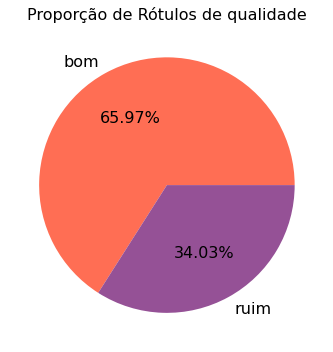

In [ ]:
colors_list = ['#ff6e54', '#955196', '#ffa600', '#003f5c', '#444e86']
df_label_white = df_white.groupby(['label'],as_index=False)['label'].value_counts()

fig, ax = plt.subplots(figsize=(15,5))
ax.pie(x='count', data=df_label_white, labels='label', autopct='%.2f%%', colors=colors_list, textprops={"fontsize":16})
ax.set_title('Proporção de Rótulos de qualidade', size=16)

plt.tight_layout()

Não é necessário nenhuma técnica de inferência estatística para afirmar que as proporções dos rótulos são diferentes.

## 1.3 Base de Dados red + white

In [ ]:
df = pd.concat([df_red, df_white], ignore_index = True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bom
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,ruim


In [ ]:
df.shape

(5320, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  label                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


Perceba que não existe dados faltantes para a base **white** e as features são quantitativas

### 1.3.1 Verificando dados faltantes

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
label                   0
dtype: int64

### 1.3.2 Remoção de linhas duplicadas

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(5318, 13)

### 1.3.3 Estatistica

Nessa seção iremos avaliar o range dos atributos, medidas de posição (média e mediana), medidades de dispersão (desvio-padrao e intervalo interquartil) e forma de distribuição (obliquidade e curtose). Após isso verificaremos a existência de outliers.

Do ponto de vista de analise multivariada será avaliado um heatmap avaliando correlação para verificarmos dependência e como o atributo quality se relaciona com os demais.

Por fim, será feita uma avaliação dos atributos quality visando obter proporções das classes e concluirmos se elas são balanceadas ou não. Para responder a questão de balanceamento realizaremos uma inferência estatística por meio de intervalo de confiança para diferença de proporções.

In [ ]:
df_describe = df.describe().reset_index()
plot_labels = df_describe.columns.tolist()[1:]
print(f'Temos um total de {len(plot_labels)} atributos quantitativos. (Considerando o atributo alvo - quality)')

Temos um total de 12 atributos quantitativos. (Considerando o atributo alvo - quality)


In [ ]:
dict_c = {0: '#003f5c', 1: '#444e86', 2: '#955196', 3: '#dd5182', 4: '#ff6e54', 5: '#ffa600'}

In [ ]:
n_cols = 3
n_linhas = 4
pos_coluna = [i for i in range(0,n_cols)] * n_linhas
pos_linha = [i//n_cols for i in range(0,df.shape[1])]

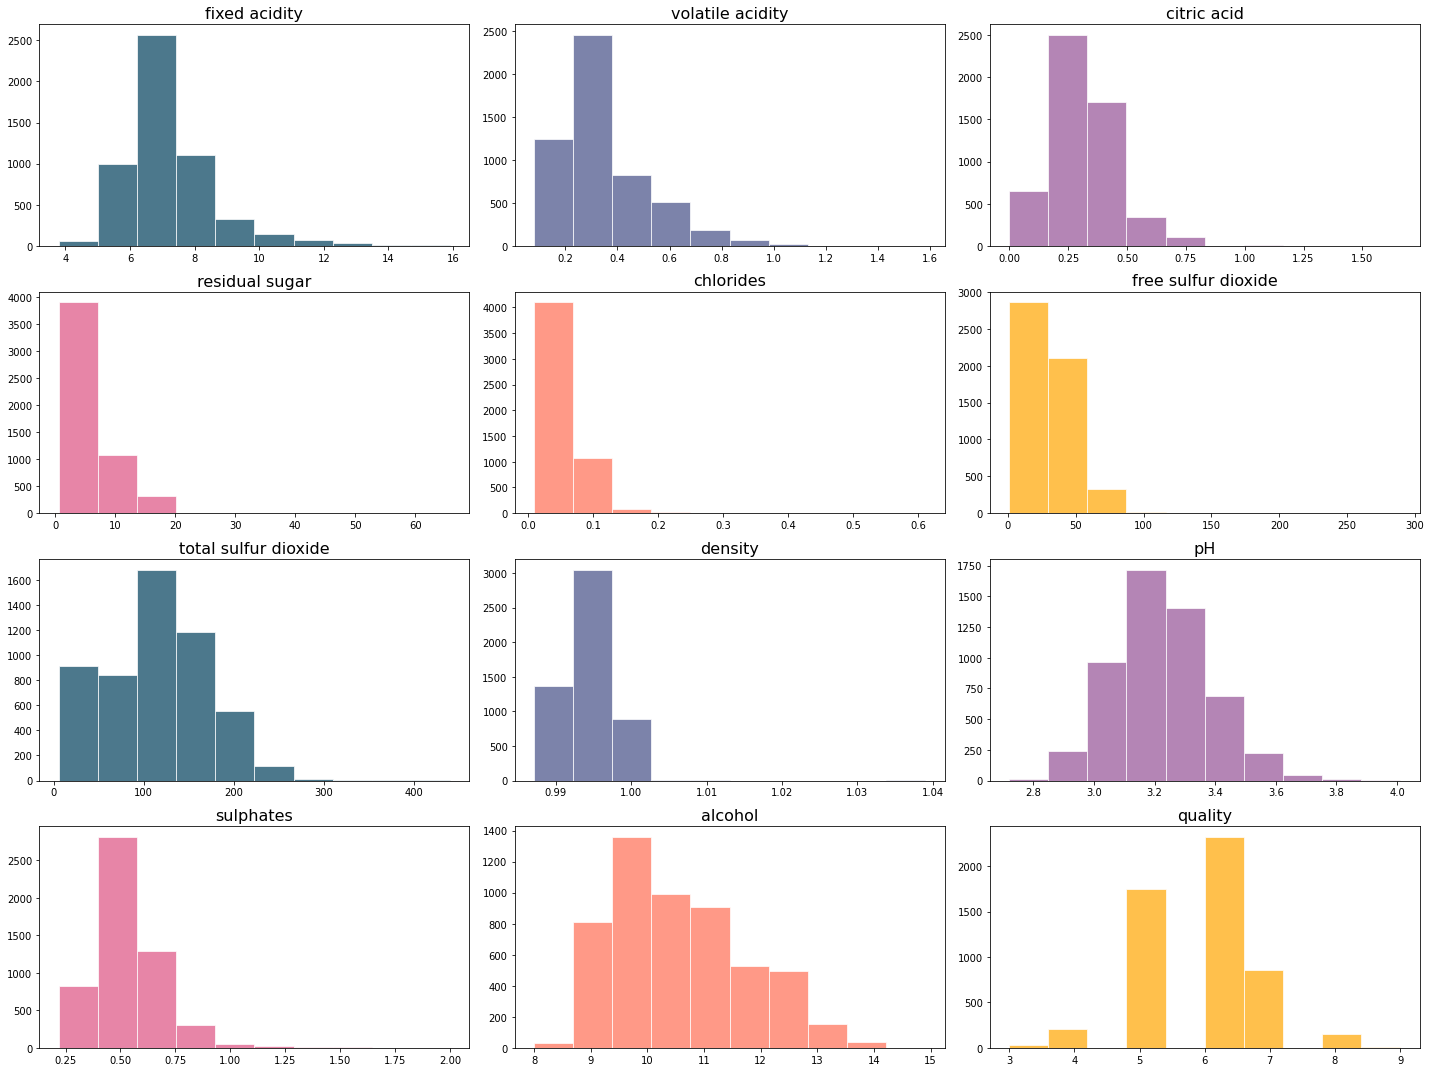

In [ ]:
fig, ax = plt.subplots(n_linhas, n_cols, figsize=(20, 15))
for i, label_id in enumerate(plot_labels):
    pal = sns.color_palette("magma")
    #sns.palplot(pal)
    ax[pos_linha[i], pos_coluna[i]].hist(x=label_id, data=df, color=dict_c[i%6], alpha=.7, edgecolor='white')
    ax[pos_linha[i], pos_coluna[i]].set_title(label_id, size=16)
    #ax.hist(x='Age', data=df_male, bins=15, color='blue', alpha=.7, edgecolor='white', label='Masculinos')
plt.tight_layout()
#plt.savefig('histograma_matplotlib.png')

Avaliando os histogramas percebemos que o atributo **pH** é simétrico (assim como nas bases separadamente) e todos os demais possuem assimetria (skewness > 0) mas não são muito obliquos, com excessao do **chlorides**. A seguir podemos verificar os dados descritivos.

Diferente da base red, o atributo **densidade** não é simetrico pra a base white.

Também verificamos um indício de simetria em **total sulfur dioxide**.

In [ ]:
data_descritiva = {
    'Max': [np.round(df[i].max(), 2) for i in plot_labels],
    'Min': [np.round(df[i].min(), 2) for i in plot_labels],
    'Intervalo': [np.round(df[i].max() - df[i].min(), 2) for i in plot_labels],
    'Média': [np.round(df[i].mean(), 2) for i in plot_labels],
    'Médiana': [np.round(df[i].median(), 2) for i in plot_labels],
    'Desvio Padrão': [np.round(df[i].std(), 2) for i in plot_labels],
    'Obliquidade': [np.round(df[i].skew(), 2) for i in plot_labels],
    'Curtose': [np.round(df[i].kurt(), 2) for i in plot_labels],
    'Intervalo Interquartil': [np.round(df[i].quantile(0.75) - df[i].quantile(0.25), 2) for i in plot_labels],
    }
df_descritiva = pd.DataFrame(data_descritiva, index = plot_labels)
df_descritiva

,Max,Min,Intervalo,Média,Médiana,Desvio Padrão,Obliquidade,Curtose,Intervalo Interquartil
fixed acidity,15.90,3.80,12.10,7.22,7.00,1.32,1.65,4.59,1.30
volatile acidity,1.58,0.08,1.50,0.34,0.30,0.17,1.50,2.86,0.18
citric acid,1.66,0.00,1.66,0.32,0.31,0.15,0.48,2.58,0.16
residual sugar,65.80,0.60,65.20,5.05,2.70,4.50,1.71,7.02,5.70
chlorides,0.61,0.01,0.60,0.06,0.05,0.04,5.34,48.27,0.03
free sulfur dioxide,289.00,1.00,288.00,30.03,28.00,17.80,1.36,9.53,25.00
total sulfur dioxide,440.00,6.00,434.00,114.11,116.00,56.78,0.06,-0.30,79.75
density,1.04,0.99,0.05,0.99,0.99,0.00,0.67,8.71,0.00
pH,4.01,2.72,1.29,3.22,3.21,0.16,0.39,0.43,0.22
sulphates,2.00,0.22,1.78,0.53,0.51,0.15,1.81,8.61,0.17


Avaliando a Tabela acima percebemos que existe uma diferença significativa na **escala** dos atributos, sendo **total sulfur dioxide** o maior range e **densidade** o menor. Mesmo comportamento da base red.

Quanto a dispersão, percebemos que **residual sugar**, **free sulfur dioxide** e **total sulfur dioxide** possuem desvio-padrão elevados quando comparados com a média

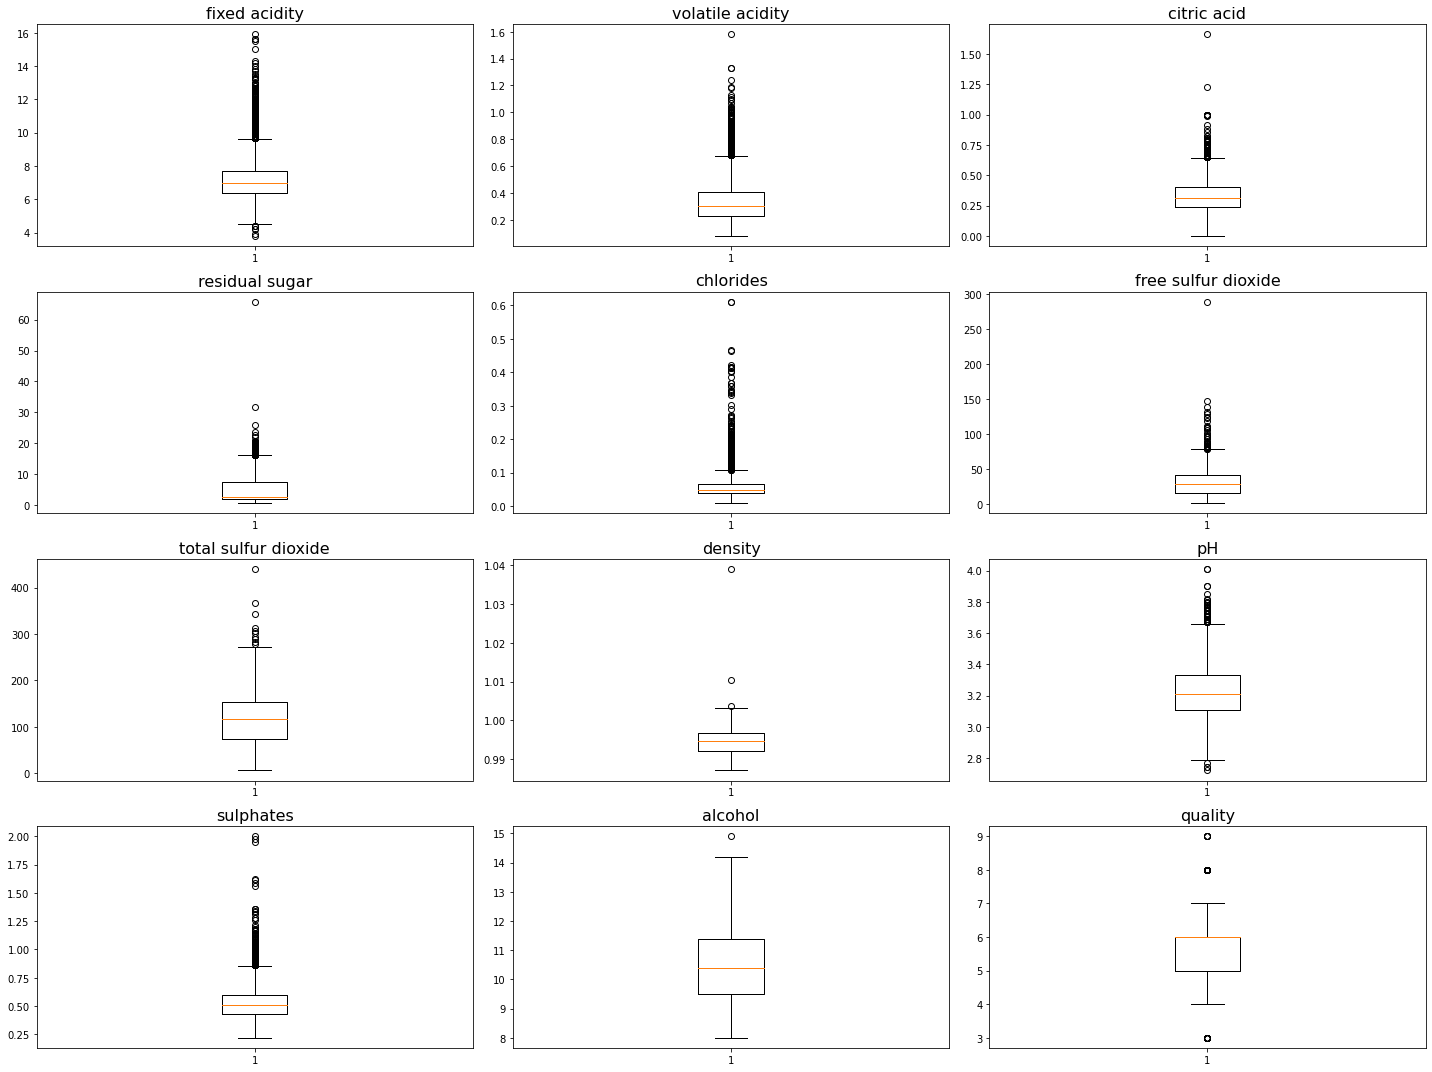

In [ ]:
fig, ax = plt.subplots(n_linhas, n_cols, figsize=(20, 15))
for i, label_id in enumerate(plot_labels):
    pal = sns.color_palette("magma")
    #sns.palplot(pal)
    ax[pos_linha[i], pos_coluna[i]].boxplot(x=label_id, data=df)
    ax[pos_linha[i], pos_coluna[i]].set_title(label_id, size=16)
    #ax.hist(x='Age', data=df_male, bins=15, color='blue', alpha=.7, edgecolor='white', label='Masculinos')
plt.tight_layout()
#plt.savefig('histograma_matplotlib.png')

Text(0.5, 1.0, 'Mapa de Calor - Correlação')

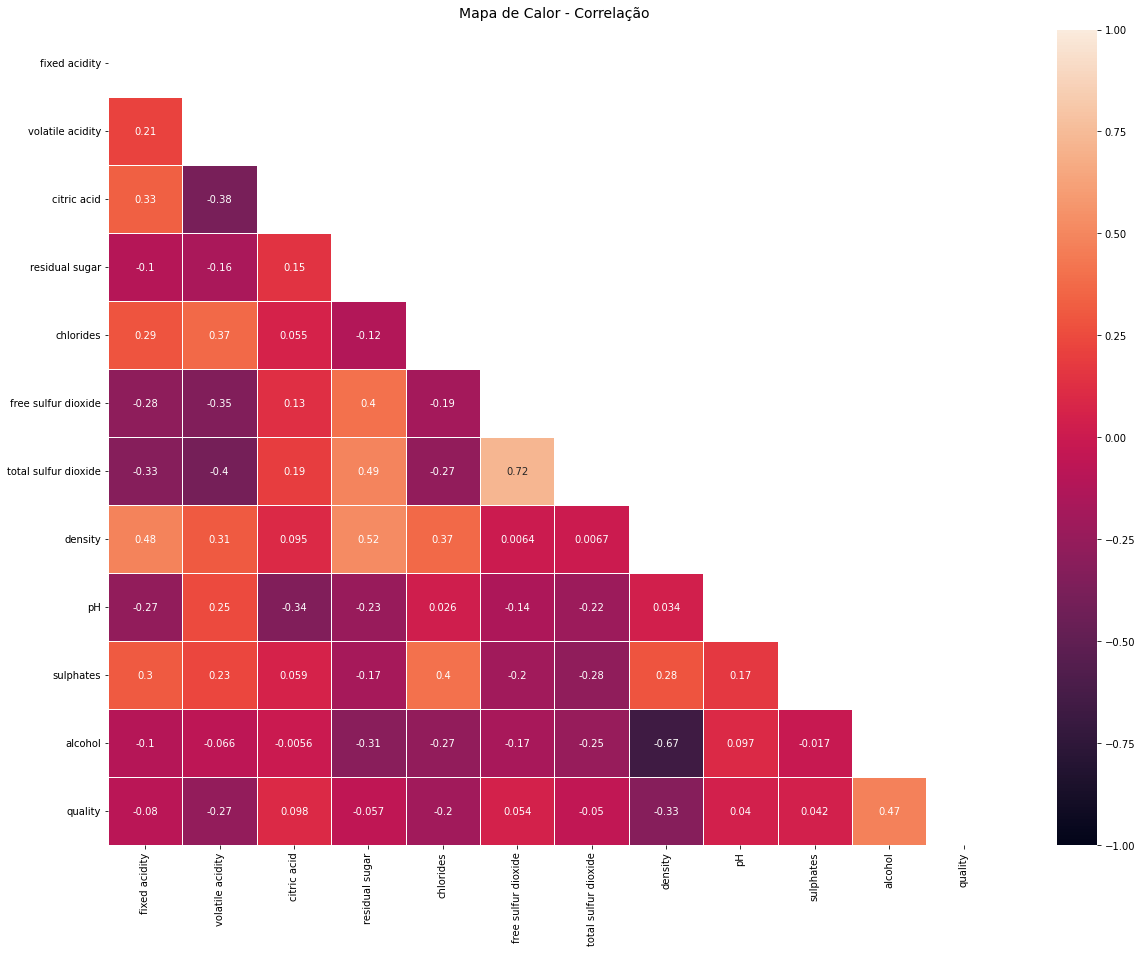

In [ ]:
corr= df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=matrix, linewidths=1, linecolor='white')
heatmap.set_title('Mapa de Calor - Correlação', fontdict={'fontsize':14}, pad=12)
#plt.savefig('heatmap.png')

Verificamos uma correlação positiva entre:
* residual sugar e density
* total sulfur dioxide e density

Verificamos uma correlação negativa entre:
* density e alcohol

### 1.3.4 Avaliação do atributo alvo 

Agora, iremos avaliar o atributo alvo (**quality**) para verificar a proporção das classes.

In [ ]:
df.groupby(by='quality').size().reset_index(name='counts')

,quality,counts
0,3,30
1,4,206
2,5,1751
3,6,2323
4,7,855
5,8,148
6,9,5


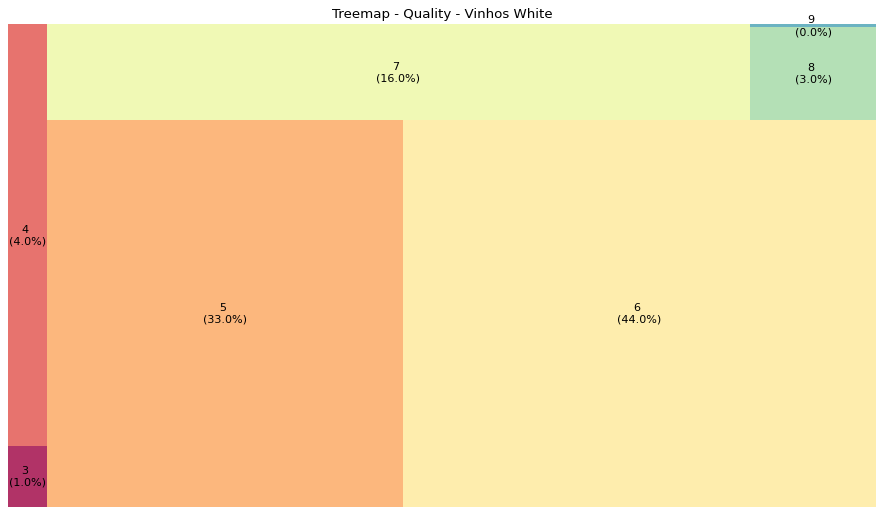

In [ ]:
df_count = df.groupby(by='quality').size().reset_index(name='counts')
sizes = df_count['counts'].values.tolist()
labels = df_count.apply(lambda x: str(x[0]) + " \n(" + str(np.round(100 * x[1] / df_count['counts'].sum(), 0)) + "%)", axis=1)
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

#draw plot
plt.figure(figsize=(14,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap - Quality - Vinhos White')
plt.axis('off')
plt.show()

In [ ]:
print(f'Os rórutlos 3 e 9 aparecem como 0% porque possuim poucos registros classificados como tais ({df_count.iloc[0, 1]} e {df_count.iloc[6, 1]}, respectivamente)')

Os rórutlos 3 e 9 aparecem como 0% porque possuim poucos registros classificados como tais (30 e 5, respectivamente)


Note que as classes 1, 2 e 10 não aparecem na base de dados. ( a classe 9 possui apenas 5 representantes)

Por fim, iremos considerar que valor de **quality** >=6 representa um vinho de qualidade boa

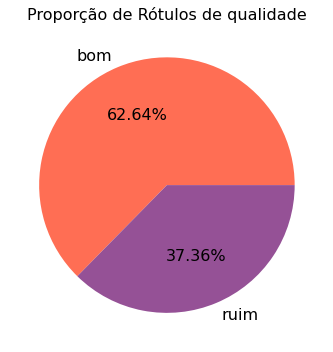

In [ ]:
colors_list = ['#ff6e54', '#955196', '#ffa600', '#003f5c', '#444e86']
df_label = df.groupby(['label'],as_index=False)['label'].value_counts()

fig, ax = plt.subplots(figsize=(15,5))
ax.pie(x='count', data=df_label, labels='label', autopct='%.2f%%', colors=colors_list, textprops={"fontsize":16})
ax.set_title('Proporção de Rótulos de qualidade', size=16)

plt.tight_layout()

Não é necessário nenhuma técnica de inferência estatística para afirmar que as proporções dos rótulos são diferentes.

# 2. Analise de Regressão Linear

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, r2_score, classification_report

from mlxtend.plotting import plot_confusion_matrix

## 2.1 Base de Dados Red

### 2.1.1 Regressão sem seleção de atributos

In [ ]:
# Speara os dados em X e Y
X = df_red.drop(['quality', 'label'], axis=1)
y = df_red['quality']

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
# Normaliza os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()

In [ ]:
# fit do modelo
model.fit(X_train_std, y_train)

LinearRegression()

In [ ]:
# Predict do modelo
y_pred = model.predict(X_test_std)

In [ ]:
# Calculo R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

R2 : 0.3815371129418359


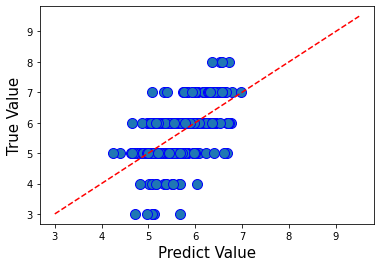

In [ ]:
# Plot dos valores preditos pelos reais
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

O resultado apresenta um valor baixo de R2 e por usar todos os atributos disponíveis, pode estar em overfitting. Logo, será conduzida uma avaliação para selecionar os atributos que melhor modelam o fenômeno.

### 2.1.2 Avaliando a seleção de atributos com validação cruzada

O intuito desta seção é avaliar a contribuição de cada atributo na composição do regressor e como eles colaboram para a interpretação do problema.

In [ ]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, X.shape[1] + 1))}]

In [ ]:
lm = LinearRegression()
lm.fit(X_train_std, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_std, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


In [ ]:
cv_summary = cv_results[['param_n_features_to_select', 'rank_test_score', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
cv_summary .sort_values(by=['rank_test_score'], ascending=True, inplace=True)
cv_summary

,param_n_features_to_select,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score
6,7,1,0.326646,0.059927,0.349717,0.006249
5,6,2,0.323965,0.060191,0.346265,0.006404
7,8,3,0.322416,0.058264,0.350238,0.006094
8,9,4,0.320976,0.059777,0.350352,0.006098
9,10,5,0.319047,0.058193,0.350938,0.005856
10,11,6,0.318663,0.057925,0.351004,0.005886
4,5,7,0.311390,0.054953,0.338357,0.005902
2,3,8,0.305322,0.057296,0.323485,0.005984
3,4,9,0.302616,0.053219,0.330471,0.005178
1,2,10,0.282002,0.053880,0.300317,0.005372


Perceba que na faixa de 0.32 para **mean_test_score** temos uma quatidade de atributos selecionados de **6 a 9**.
O critério utilizado é R2 e observa-se pouco ganho a utilizar mais do que 6 atributos, o que é um indício de overfitting. o que é um indício de overfitting na regressão com todos os atributos aplicados. A seguir exibimos um gráfico do comportamento de R2 na base de treinamento e teste.

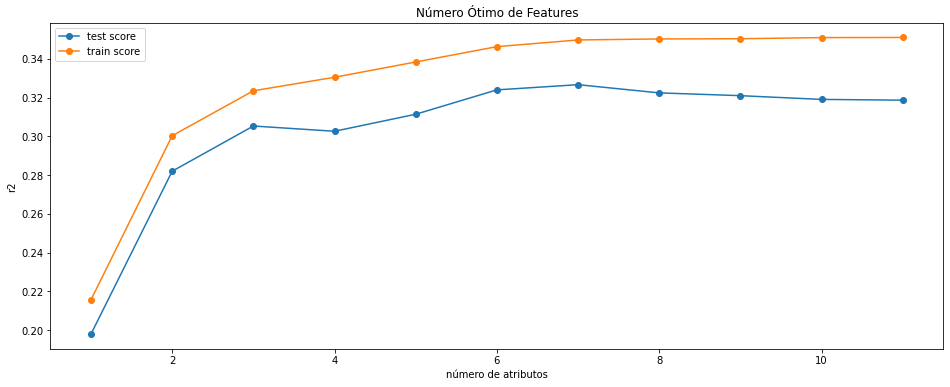

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"], marker = 'o')
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"], marker = 'o')
plt.xlabel('número de atributos')
plt.ylabel('r2')
plt.title("Número Ótimo de Features")
plt.legend(['test score', 'train score'], loc='upper left')

plt.show()

Observa-se que 6 atributos são capazes de fornecer o comportamento do modelo (pois forma um plato) mesmo o R2 sendo no geral baixo. Vamos investigar quais atribbutos fornecem os melhores regressores.

### 2.1.3 Coeficientes dos melhores regressores

In [ ]:
feature_matrix = []

for i in range(1, len(X.columns.tolist())+1):
    hyper_params = [{'n_features_to_select':[i]}]
    
    # Neste ponto eu tenho duvida:
    # poderia passar X e y pre-processados inves de X_train e y_train pois OU 
    # passo X e Y e de alguma maneira faço o pré-processamento para cada fold?
    # seria o caso de usar uma pipeline?
    lm = LinearRegression()
    lm.fit(X_train_std, y_train)
    rfe = RFE(lm)

    model_cv = GridSearchCV(estimator = rfe,
                            param_grid = hyper_params,
                            scoring= 'r2',
                            cv = folds,
                            verbose = 0,
                            return_train_score=True)
    
    model_cv.fit(X_train_std, y_train) 
    
    feature_coef = model_cv.best_estimator_.estimator_.coef_.tolist()
    feature_flag = model_cv.best_estimator_.support_.tolist()
    
    # Armazenando os coeficientes em uma lista para visualização
    feature_list = [i]
    cont = 0
    for i in range(len(feature_flag)):
        if feature_flag[i]:
            feature_list.append(feature_coef[cont])
            cont += 1
        else:
            feature_list.append(0)
            
    # Identificado o melhor R2 no fold teste
    cv_results = pd.DataFrame(model_cv.cv_results_)
    best_test_score = -1
    for i in cv_results.columns.tolist():
        if 'test_score' in i and 'rank_test_score' not in i:
            if cv_results[i][0] > best_test_score:
                best_test_score = cv_results[i][0]
    feature_list.append(best_test_score)            
    feature_matrix.append(feature_list)
    
column_values = X.columns.tolist()
column_values.append('r2')
column_values.insert(0, 'n_coef')

regression_df = pd.DataFrame(data = feature_matrix,  
                  columns = column_values)
regression_df

,n_coef,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,r2
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382470,0.274758
1,2,0.000000,-0.245044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330741,0.370229
2,3,0.000000,-0.214738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129235,0.325014,0.405017
3,4,0.000000,-0.205753,0.000000,0.000000,-0.072261,0.000000,0.000000,0.000000,0.000000,0.159713,0.307792,0.389220
4,5,0.000000,-0.183390,0.000000,0.000000,-0.088256,0.000000,0.000000,0.000000,-0.082283,0.151628,0.326137,0.401355
5,6,0.000000,-0.181993,0.000000,0.000000,-0.093920,0.000000,-0.077833,0.000000,-0.084890,0.158922,0.305820,0.433544
6,7,0.000000,-0.175018,0.000000,0.000000,-0.092774,0.066311,-0.123492,0.000000,-0.093050,0.156895,0.303967,0.435885
7,8,-0.018941,-0.175702,0.000000,0.000000,-0.095127,0.066156,-0.126388,0.000000,-0.106646,0.158266,0.304109,0.434133
8,9,-0.032042,-0.176717,0.000000,0.000000,-0.095935,0.066664,-0.128038,0.013834,-0.112570,0.157122,0.311009,0.433922
9,10,-0.052196,-0.177570,0.000000,-0.023624,-0.096565,0.067776,-0.123953,0.038475,-0.123229,0.152507,0.328349,0.431949


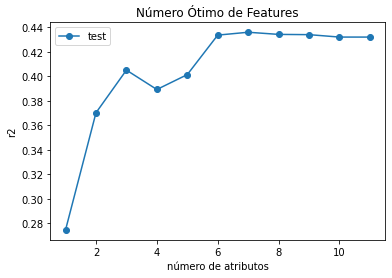

In [ ]:
plt.plot(regression_df['n_coef'], regression_df['r2'], marker = 'o')
plt.xlabel('número de atributos')
plt.ylabel('r2')
plt.title("Número Ótimo de Features")
plt.legend(['test'], loc='upper left')
plt.show()

Pensando na importância dos atributos, existe uma ordem deles na regressão para a geração de ganho. Assim sendo, com até 6 atributos temos ganho e em ordem são:
* alcohol
* volatile acidity
* sulphates
* chlorides
* ph
* total sulfur dioxide

Percebe-se que a adição dos três ultimos termos (vide tabela de coeficientes) é feita com valores de coeficiente baixos, revelando a baixa contribuição, o que é um indicativo de parada para não ocorrer overfitting.

### 2.1.4 Regressão com seleção de atributos

In [ ]:
atributos = ['volatile acidity', 'chlorides','total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

In [ ]:
# Filtrando os dados de treino e teste
X_sel_train = X_train[atributos]
X_sel_test = X_test[atributos]

In [ ]:
# Instancia a normalização e normaliza os dados
scaler = StandardScaler()
X_sel_train_std = scaler.fit_transform(X_sel_train)
X_sel_test_std = scaler.transform(X_sel_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()
#model = Lasso(max_iter=10000, alpha=0.5)
#model = Ridge(alpha=2)

In [ ]:
# fit do modelo
model.fit(X_sel_train_std, y_train)

LinearRegression()

In [ ]:
# Predict do modelo
y_pred = model.predict(X_sel_test_std)

In [ ]:
# Calculo R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

R2 : 0.3935586177026139


In [ ]:
model.coef_

array([-0.18199271, -0.09392046, -0.07783292, -0.08489016,  0.15892231,
        0.30582004])

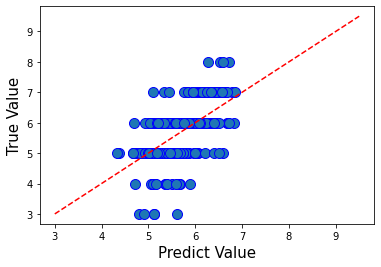

In [ ]:
# Plot dos valores preditos pelos reais
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Observe que o primeiro regressor (todos os atributos) forneceu um R2 de 0.381 e o regressor com seleção de atributos não fornece um valor de R2 muito melhor, sendo 0.393. Mas, o segundo regressor é mais generalista que o primeiro.

O método de regressão Lasso poderia ter sido utilizado, mas o método de seleção de atributos por meio de eliminação recurssiva já havia sido implementado na execução desse projeto. Acreditamos que o Lasso, após ajuste do parâmetro **alpha** poderia trazer dados comparáveis aos apresentados.

Por fim, um módelo de regressão linear não se mostra como uma boa opçao para o problema, devido o baixo valor de R2, comparação de valores de teste (inteiros) e preditos (racionais/float) e facilidade de obter resultados com overfitting devido o número de atributos.

Outros estudos foram realizados com validação cruzada e eliminação recurssiva de atributos (RFECV) e implementação de um pipeline junto com o grid search. Obteve-se resultado ligeiramente diferente para os coeficientes, mas o ótimo continuou entre 5 e 7 atributos. Os resultados não foram aqui apresentados, pois o conteúdo será ensinado em módulos futuros.

## 2.2 Base de Dados White

### 2.2.1 Regressão sem seleção de atributos

In [ ]:
# Speara os dados em X e Y
X = df_white.drop(['quality', 'label'], axis=1)
y = df_white['quality']

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
# Normaliza os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()

In [ ]:
# fit do modelo
model.fit(X_train_std, y_train)

LinearRegression()

In [ ]:
# Predict do modelo
y_pred = model.predict(X_test_std)

In [ ]:
# Calculo R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

R2 : 0.2723275423550918


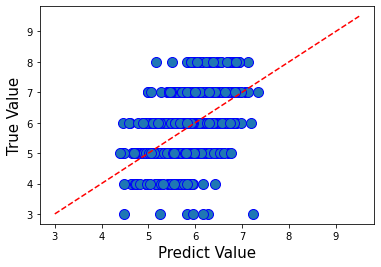

In [ ]:
# Plot dos valores preditos pelos reais
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

O resultado apresenta um valor baixo de R2 (menor que para a base red) e por usar todos os atributos disponíveis, pode estar em overfitting. Logo, será conduzida uma avaliação para selecionar os atributos que melhor modelam o fenômeno, avaliando se os atributos irão diferir da base red.

### 2.2.2 Avaliando a seleção de atributos com validação cruzada

O intuito desta seção é avaliar a contribuição de cada atributo na composição do regressor e como eles colaboram para a interpretação do problema.

In [ ]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, X.shape[1] + 1))}]

In [ ]:
lm = LinearRegression()
lm.fit(X_train_std, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_std, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


In [ ]:
cv_summary = cv_results[['param_n_features_to_select', 'rank_test_score', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
cv_summary .sort_values(by=['rank_test_score'], ascending=True, inplace=True)
cv_summary

,param_n_features_to_select,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score
5,6,1,0.291061,0.041405,0.303437,0.004060
6,7,2,0.290619,0.050548,0.307011,0.003946
9,10,3,0.288946,0.057863,0.309726,0.004679
10,11,4,0.288634,0.057247,0.309853,0.004633
7,8,5,0.286341,0.059193,0.308502,0.004723
8,9,6,0.286254,0.059503,0.309250,0.004815
3,4,7,0.278979,0.032589,0.287317,0.003343
2,3,8,0.277393,0.028024,0.284262,0.002943
4,5,9,0.277118,0.042914,0.296772,0.004021
1,2,10,0.266593,0.031512,0.273082,0.003440


Perceba que na faixa entre 0.30 e 0.28 para **mean_test_score** temos uma quatidade de atributos selecionados de **6 a 11**.
O critério utilizado é R2 e não observa-se pouco ganho ao utilizar mais do que 6 atributos, o que é um indício de overfitting na regressão com todos os atributos aplicados. A seguir exibimos um gráfico do comportamento de R2 na base de treinamento e teste.

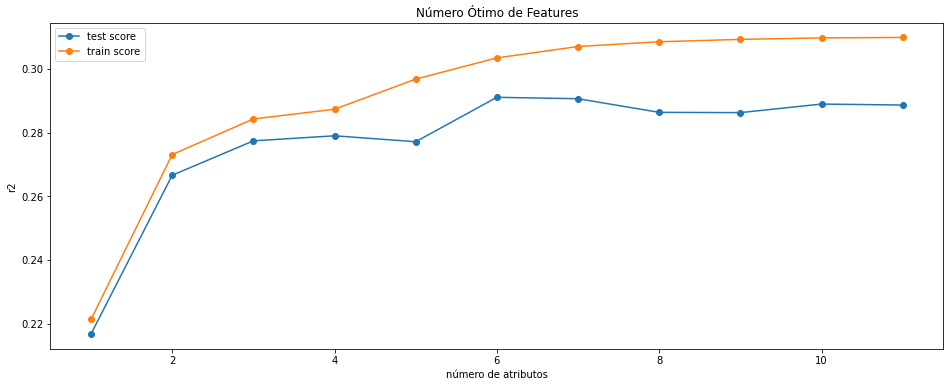

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"], marker = 'o')
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"], marker = 'o')
plt.xlabel('número de atributos')
plt.ylabel('r2')
plt.title("Número Ótimo de Features")
plt.legend(['test score', 'train score'], loc='upper left')

plt.show()

Observa-se que 6 ou 7 atributos são capazes de fornecer o comportamento do modelo (pois forma um plato) mesmo o R2 sendo no geral baixo. Vamos investigar quais atribbutos fornecem os melhores regressores.

### 2.2.3 Coeficientes dos melhores regressores

In [ ]:
feature_matrix = []

for i in range(1, len(X.columns.tolist())+1):
    hyper_params = [{'n_features_to_select':[i]}]
    
    # Neste ponto eu tenho duvida:
    # poderia passar X e y pre-processados inves de X_train e y_train pois OU 
    # passo X e Y e de alguma maneira faço o pré-processamento para cada fold?
    # seria o caso de usar uma pipeline?
    lm = LinearRegression()
    lm.fit(X_train_std, y_train)
    rfe = RFE(lm)

    model_cv = GridSearchCV(estimator = rfe,
                            param_grid = hyper_params,
                            scoring= 'r2',
                            cv = folds,
                            verbose = 0,
                            return_train_score=True)
    
    model_cv.fit(X_train_std, y_train) 
    
    feature_coef = model_cv.best_estimator_.estimator_.coef_.tolist()
    feature_flag = model_cv.best_estimator_.support_.tolist()
    
    # Armazenando os coeficientes em uma lista para visualização
    feature_list = [i]
    cont = 0
    for i in range(len(feature_flag)):
        if feature_flag[i]:
            feature_list.append(feature_coef[cont])
            cont += 1
        else:
            feature_list.append(0)
            
    # Identificado o melhor R2 no fold teste
    cv_results = pd.DataFrame(model_cv.cv_results_)
    best_test_score = -1
    for i in cv_results.columns.tolist():
        if 'test_score' in i and 'rank_test_score' not in i:
            if cv_results[i][0] > best_test_score:
                best_test_score = cv_results[i][0]
    feature_list.append(best_test_score)            
    feature_matrix.append(feature_list)
    
column_values = X.columns.tolist()
column_values.append('r2')
column_values.insert(0, 'n_coef')

regression_df = pd.DataFrame(data = feature_matrix,  
                  columns = column_values)
regression_df

,n_coef,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,r2
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.419367,0.262883
1,2,0.000000,-0.203082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.431440,0.319622
2,3,0.000000,-0.214563,0.000000,0.103352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473385,0.320326
3,4,0.000000,-0.209263,0.000000,0.196821,0.000000,0.000000,0.000000,-0.150319,0.000000,0.000000,0.397554,0.327535
4,5,0.000000,-0.199074,0.000000,0.159853,0.000000,0.089704,0.000000,-0.129728,0.000000,0.000000,0.420265,0.338616
5,6,0.000000,-0.193545,0.000000,0.216020,0.000000,0.085141,0.000000,-0.199092,0.080229,0.000000,0.383083,0.349917
6,7,0.000000,-0.192231,0.000000,0.244602,0.000000,0.083053,0.000000,-0.241855,0.076533,0.057253,0.362795,0.356411
7,8,0.036911,-0.188678,0.000000,0.293416,0.000000,0.084040,0.000000,-0.318410,0.098544,0.060757,0.327055,0.352562
8,9,0.036573,-0.184500,0.000000,0.286982,0.000000,0.099551,-0.028890,-0.302802,0.098389,0.063052,0.326931,0.352286
9,10,0.032136,-0.178673,0.030798,0.294096,0.000000,0.098129,-0.031599,-0.316458,0.102926,0.062255,0.319274,0.354022


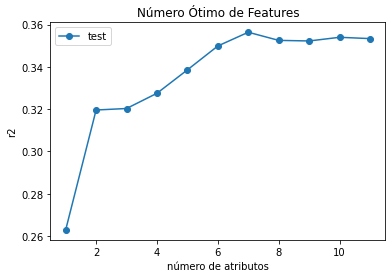

In [ ]:
plt.plot(regression_df['n_coef'], regression_df['r2'], marker = 'o')
plt.xlabel('número de atributos')
plt.ylabel('r2')
plt.title("Número Ótimo de Features")
plt.legend(['test'], loc='upper left')
plt.show()

Pensando na importância dos atributos, existe uma ordem deles na regressão para a geração de ganho. Assim sendo, com até 6 atributos temos ganho e em ordem são:
* alcohol
* volatile acidity
* residual sugar
* density
* free sulfur dioxide
* ph

Percebe-se que a adição dos três ultimos termos (vide tabela de coeficientes) é feita com valores de coeficiente baixos, revelando a baixa contribuição, o que é um indicativo de parada para não ocorrer overfitting.

Note que (chlorides, total sulfur dioxide, sulphates) sairam dos atributos selecionados quando comparados coma base red e (residual sugar, free sulfur dioxide, density) entraram nos atributos selecionados.

### 2.2.4 Regressão com seleção de atributos

In [ ]:
atributos = ['volatile acidity', 'residual sugar','free sulfur dioxide', 'density', 'pH', 'alcohol']

In [ ]:
# Filtrando os dados de treino e teste
X_sel_train = X_train[atributos]
X_sel_test = X_test[atributos]

In [ ]:
# Instancia a normalização e normaliza os dados
scaler = StandardScaler()
X_sel_train_std = scaler.fit_transform(X_sel_train)
X_sel_test_std = scaler.transform(X_sel_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()
#model = Lasso(max_iter=10000, alpha=0.5)
#model = Ridge(alpha=2)

In [ ]:
# fit do modelo
model.fit(X_sel_train_std, y_train)

LinearRegression()

In [ ]:
# Predict do modelo
y_pred = model.predict(X_sel_test_std)

In [ ]:
# Calculo R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

R2 : 0.2615956197188348


In [ ]:
model.coef_

array([-0.19354487,  0.21601988,  0.08514118, -0.19909156,  0.08022876,
        0.3830834 ])

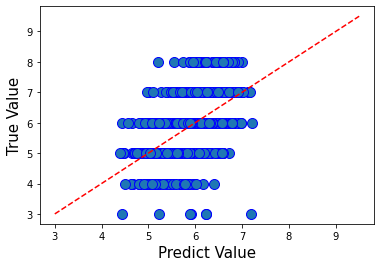

In [ ]:
# Plot dos valores preditos pelos reais
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Observe que o primeiro regressor (todos os atributos) forneceu um R2 de 0.272 e o regressor com seleção de atributos não fornece um valor de R2 muito melhor, sendo 0.262. Mesmo comportamento observado na base red e novamente o segundo regressor é mais generalista que o primeiro.

## 2.3 Base de Dados Full

### 2.3.1 Regressão sem seleção de atributos

In [ ]:
# Speara os dados em X e Y
X = df.drop(['quality', 'label'], axis=1)
y = df['quality']

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
# Normaliza os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()

In [ ]:
# fit do modelo
model.fit(X_train_std, y_train)

LinearRegression()

In [ ]:
# Predict do modelo
y_pred = model.predict(X_test_std)

In [ ]:
# Calculo R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

R2 : 0.31241898483682673


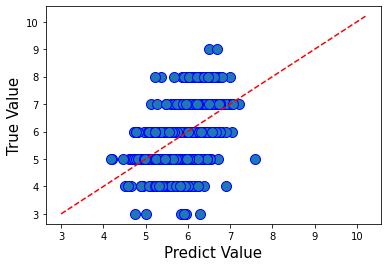

In [ ]:
# Plot dos valores preditos pelos reais
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

O resultado apresenta um valor baixo de R2 (menor que para a base red) e por usar todos os atributos disponíveis, pode estar em overfitting. Logo, será conduzida uma avaliação para selecionar os atributos que melhor modelam o fenômeno, avaliando se os atributos irão diferir da base red.

### 2.3.2 Avaliando a seleção de atributos com validação cruzada

O intuito desta seção é avaliar a contribuição de cada atributo na composição do regressor e como eles colaboram para a interpretação do problema.

In [ ]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, X.shape[1] + 1))}]

In [ ]:
lm = LinearRegression()
lm.fit(X_train_std, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_std, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


In [ ]:
cv_summary = cv_results[['param_n_features_to_select', 'rank_test_score', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
cv_summary .sort_values(by=['rank_test_score'], ascending=True, inplace=True)
cv_summary

,param_n_features_to_select,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score
10,11,1,0.295634,0.048185,0.305254,0.005159
8,9,2,0.295483,0.050373,0.304307,0.005391
9,10,3,0.294362,0.049134,0.304826,0.005270
5,6,4,0.292567,0.052809,0.299799,0.005680
6,7,5,0.292148,0.052749,0.300321,0.005668
7,8,6,0.291469,0.052219,0.300994,0.005741
4,5,7,0.289420,0.049325,0.295100,0.005288
3,4,8,0.279514,0.048815,0.284986,0.005282
2,3,9,0.270538,0.044393,0.276480,0.004953
1,2,10,0.269737,0.042690,0.273235,0.004750


Perceba que na faixa entre 0.30 e 0.29 para **mean_test_score** temos uma quatidade de atributos selecionados de **6 a 11**.
O critério utilizado é R2 e não observa-se pouco ganho ao utilizar mais do que 6 atributos, o que é um indício de overfitting na regressão com todos os atributos aplicados. A seguir exibimos um gráfico do comportamento de R2 na base de treinamento e teste.

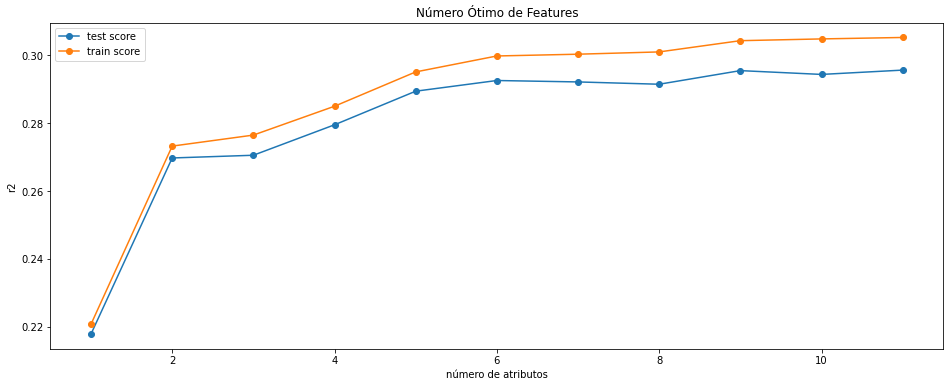

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"], marker = 'o')
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"], marker = 'o')
plt.xlabel('número de atributos')
plt.ylabel('r2')
plt.title("Número Ótimo de Features")
plt.legend(['test score', 'train score'], loc='upper left')

plt.show()

Observa-se que 9 ou 11 atributos são capazes de fornecer o comportamento do modelo (pois forma um plato) mesmo o R2 sendo no geral baixo. Vamos investigar quais atribbutos fornecem os melhores regressores.

### 2.3.3 Coeficientes dos melhores regressores

In [ ]:
feature_matrix = []

for i in range(1, len(X.columns.tolist())+1):
    hyper_params = [{'n_features_to_select':[i]}]
    
    # Neste ponto eu tenho duvida:
    # poderia passar X e y pre-processados inves de X_train e y_train pois OU 
    # passo X e Y e de alguma maneira faço o pré-processamento para cada fold?
    # seria o caso de usar uma pipeline?
    lm = LinearRegression()
    lm.fit(X_train_std, y_train)
    rfe = RFE(lm)

    model_cv = GridSearchCV(estimator = rfe,
                            param_grid = hyper_params,
                            scoring= 'r2',
                            cv = folds,
                            verbose = 0,
                            return_train_score=True)
    
    model_cv.fit(X_train_std, y_train) 
    
    feature_coef = model_cv.best_estimator_.estimator_.coef_.tolist()
    feature_flag = model_cv.best_estimator_.support_.tolist()
    
    # Armazenando os coeficientes em uma lista para visualização
    feature_list = [i]
    cont = 0
    for i in range(len(feature_flag)):
        if feature_flag[i]:
            feature_list.append(feature_coef[cont])
            cont += 1
        else:
            feature_list.append(0)
            
    # Identificado o melhor R2 no fold teste
    cv_results = pd.DataFrame(model_cv.cv_results_)
    best_test_score = -1
    for i in cv_results.columns.tolist():
        if 'test_score' in i and 'rank_test_score' not in i:
            if cv_results[i][0] > best_test_score:
                best_test_score = cv_results[i][0]
    feature_list.append(best_test_score)            
    feature_matrix.append(feature_list)
    
column_values = X.columns.tolist()
column_values.append('r2')
column_values.insert(0, 'n_coef')

regression_df = pd.DataFrame(data = feature_matrix,  
                  columns = column_values)
regression_df

,n_coef,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,r2
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416057,0.285438
1,2,0.000000,-0.203179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404201,0.359113
2,3,0.000000,-0.182448,0.000000,0.000000,0.000000,0.055399,0.000000,0.000000,0.000000,0.000000,0.414654,0.365289
3,4,0.000000,-0.207165,0.000000,0.000000,0.000000,0.131235,-0.123186,0.000000,0.000000,0.000000,0.394500,0.368313
4,5,0.000000,-0.220388,0.000000,0.000000,0.000000,0.128780,-0.101253,0.000000,0.000000,0.093310,0.399485,0.368615
5,6,0.000000,-0.221038,0.000000,0.071967,0.000000,0.120201,-0.126274,0.000000,0.000000,0.097316,0.415050,0.381319
6,7,0.000000,-0.213815,0.000000,0.091219,0.000000,0.119998,-0.134774,-0.035916,0.000000,0.106544,0.394838,0.381946
7,8,0.003881,-0.212872,0.000000,0.093804,0.000000,0.120327,-0.135031,-0.041136,0.000000,0.107095,0.392525,0.377501
8,9,0.095959,-0.202915,0.000000,0.186308,0.000000,0.121679,-0.141425,-0.194572,0.090818,0.116525,0.317465,0.378886
9,10,0.089540,-0.199599,0.000000,0.174486,-0.022419,0.123165,-0.143921,-0.176932,0.085058,0.119165,0.319351,0.375317


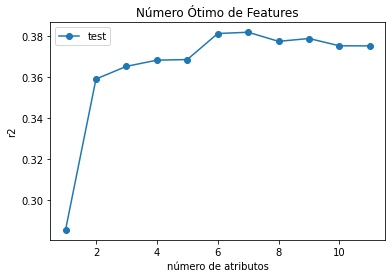

In [ ]:
plt.plot(regression_df['n_coef'], regression_df['r2'], marker = 'o')
plt.xlabel('número de atributos')
plt.ylabel('r2')
plt.title("Número Ótimo de Features")
plt.legend(['test'], loc='upper left')
plt.show()

Pensando na importância dos atributos, existe uma ordem deles na regressão para a geração de ganho. Assim sendo, com até 6 atributos temos ganho e em ordem são:
* alcohol
* volatile acidity
* free sulfur dioxide
* total sulfur dioxide
* sulphates
* residual sugar

Percebe-se que o atributo alcohol e volatile aparece na três bases (red, white e full), mostram a sua capacidade de representar a variabilidade das base. Sempre houve algum atributo relacionado a enxofre. E os demais atributos entram com menor peso, mas n são novidade na base full.

### 2.3.4 Regressão com seleção de atributos

In [ ]:
atributos = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

In [ ]:
# Filtrando os dados de treino e teste
X_sel_train = X_train[atributos]
X_sel_test = X_test[atributos]

In [ ]:
# Instancia a normalização e normaliza os dados
scaler = StandardScaler()
X_sel_train_std = scaler.fit_transform(X_sel_train)
X_sel_test_std = scaler.transform(X_sel_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()
#model = Lasso(max_iter=10000, alpha=0.5)
#model = Ridge(alpha=2)

In [ ]:
# fit do modelo
model.fit(X_sel_train_std, y_train)

LinearRegression()

In [ ]:
# Predict do modelo
y_pred = model.predict(X_sel_test_std)

In [ ]:
# Calculo R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

R2 : 0.3057527256075795


In [ ]:
model.coef_

array([-0.2210378 ,  0.07196687,  0.12020067, -0.1262735 ,  0.09731618,
        0.41505004])

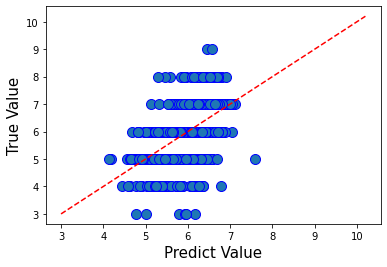

In [ ]:
# Plot dos valores preditos pelos reais
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Observe que o primeiro regressor (todos os atributos) forneceu um R2 de 0.312 e o regressor com seleção de atributos não fornece um valor de R2 muito melhor, sendo 0.310. Mesmo comportamento observado na base red/whitee novamente o segundo regressor é mais generalista que o primeiro.

# 3. Analise de Regressão Logística

## 3.1 Base de dados Red

A regressão será realizada aproveitando os atributos selecionados na regressão linear.

In [ ]:
# Speara os dados em X e Y
X = df_red.drop(['quality', 'label'], axis=1)
dict_label = {'ruim': 0, 'bom':1}
y = df_red['label'].map(dict_label)

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
atributos = ['volatile acidity', 'chlorides','total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

In [ ]:
# Filtrando os dados de treino e teste
X_sel_train = X_train[atributos]
X_sel_test = X_test[atributos]

In [ ]:
# Instancia a normalização e normaliza os dados
scaler = StandardScaler()
X_sel_train_std = scaler.fit_transform(X_sel_train)
X_sel_test_std = scaler.transform(X_sel_test)

In [ ]:
# Instancia o modelo
model = LogisticRegression(max_iter = 1000)

In [ ]:
# Fit do modelo
model.fit(X_sel_train_std, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Gera o predict
y_pred = model.predict(X_sel_test_std)

In [ ]:
type(y_test), type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

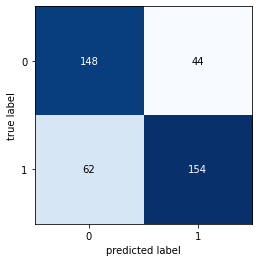

In [ ]:
# gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
# Print do Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74       192
           1       0.78      0.71      0.74       216

    accuracy                           0.74       408
   macro avg       0.74      0.74      0.74       408
weighted avg       0.74      0.74      0.74       408



### 3.1.1 Avaliando Limiar de Corte

In [ ]:
y_proba_test = model.predict_proba(X_sel_test_std)
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

NameError: name 'model' is not defined

In [ ]:
# Parâmetros para o Looping
threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [ ]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['label'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['label'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['label'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['label'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    #print('(tsh:' + str(i_threshold) + str(TN) + ', ' + str(FN) + ', ' + str(TP) + ', ' + str(TP) + ')')
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_sel_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [ ]:
df_sel_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,192,216,0.5294,1.0000,0.5294,0.6923
1,0.04,1,0,191,216,0.5307,1.0000,0.5319,0.6934
2,0.06,2,0,190,216,0.5320,1.0000,0.5343,0.6945
3,0.08,4,0,188,216,0.5347,1.0000,0.5392,0.6968
4,0.10,9,0,183,216,0.5414,1.0000,0.5515,0.7024
5,0.12,16,0,176,216,0.5510,1.0000,0.5686,0.7105
6,0.14,20,4,172,212,0.5521,0.9815,0.5686,0.7067
7,0.16,31,6,161,210,0.5660,0.9722,0.5907,0.7155
8,0.18,39,8,153,208,0.5762,0.9630,0.6054,0.7210
9,0.20,46,10,146,206,0.5852,0.9537,0.6176,0.7254


Text(0.5, 1.0, 'Optimal Proportion Evaluation')

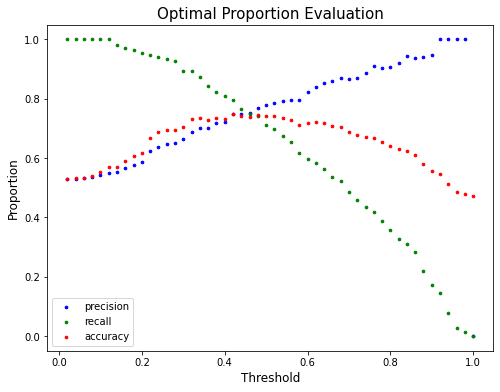

In [ ]:
# Precison-Recall-Threshold Curve
k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_sel_results['threshold'], df_sel_results['precision'], color = 'b', s = 7)
ax1.scatter(df_sel_results['threshold'], df_sel_results['recall']   , color = 'g', s = 7)
ax1.scatter(df_sel_results['threshold'], df_sel_results['accuracy']   , color = 'r', s = 7)
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)
plt.legend(['precision', 'recall', 'accuracy'])
plt.title("Optimal Proportion Evaluation", fontsize = 15)

[Text(0.5, 0, 'Threshold'), Text(0, 0.5, 'F1 Score'), (0.0, 1.02), (0.0, 1.0)]

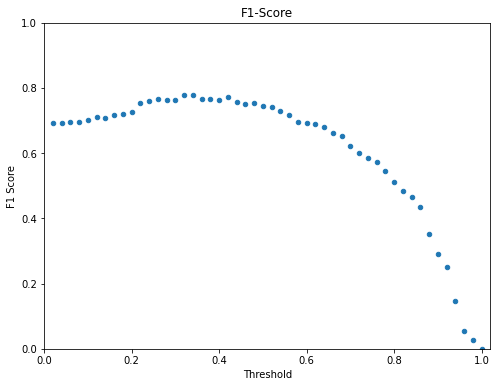

In [ ]:
# F1-Score Curve
grap = df_sel_results[df_sel_results["threshold"] > 0.0].plot(kind="scatter",
                                                              x="threshold",
                                                              y="f1_score",
                                                              grid=False,
                                                              legend=True,
                                                              title="F1-Score",
                                                              figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))

Para determinar o valor de threshold buscaremos um compromisso entre **acurácia** e **precisão**. O motivo de escolher o critério **precisão** é que não queremos classificar vinhos ruins como bons, seria prejudicial para a vínicola, enólogo e/ou sommelir. Esse é o mesmo caso de inspeção de peças por fábricas, não queremos peças ruins classificadas como boas.

Contudo, **priorizar a apenas a precisão gera um impacto negativo na acurácia**. Existe um leve plato de acurácia para limiares entre 0.4 e 0.64. E quanto maior o limiar melhor a precisão, adotaremos um limiar de 0.64

In [ ]:
# Cria o predict usando um novo threshold
y_pred_tsh = np.where(y_proba_test[:,1] >= 0.64, 1, 0)

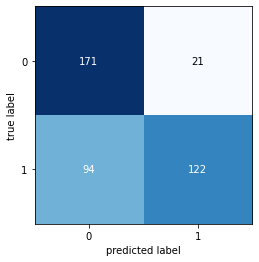

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_tsh)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
# Print do classification report
print(classification_report(y_test, y_pred_tsh))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       192
           1       0.85      0.56      0.68       216

    accuracy                           0.72       408
   macro avg       0.75      0.73      0.71       408
weighted avg       0.76      0.72      0.71       408



Com esse limiar a acurácia em 2.7% em 11.6%

## 3.2 Base de dados White

A regressão será realizada aproveitando os atributos selecionados na regressão linear.

In [ ]:
# Speara os dados em X e Y
X = df_white.drop(['quality', 'label'], axis=1)
dict_label = {'ruim': 0, 'bom':1}
y = df_white['label'].map(dict_label)

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
atributos = ['volatile acidity', 'residual sugar','free sulfur dioxide', 'density', 'pH', 'alcohol']

In [ ]:
# Filtrando os dados de treino e teste
X_sel_train = X_train[atributos]
X_sel_test = X_test[atributos]

In [ ]:
# Instancia a normalização e normaliza os dados
scaler = StandardScaler()
X_sel_train_std = scaler.fit_transform(X_sel_train)
X_sel_test_std = scaler.transform(X_sel_test)

In [ ]:
# Instancia o modelo
model = LogisticRegression(max_iter = 1000)

In [ ]:
# Fit do modelo
model.fit(X_sel_train_std, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Gera o predict
y_pred = model.predict(X_sel_test_std)

In [ ]:
type(y_test), type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

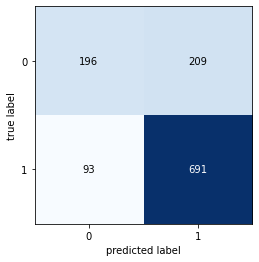

In [ ]:
# gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
# Print do Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       405
           1       0.77      0.88      0.82       784

    accuracy                           0.75      1189
   macro avg       0.72      0.68      0.69      1189
weighted avg       0.74      0.75      0.73      1189



### 3.2.1 Avaliando Limiar de Corte

In [ ]:
y_proba_test = model.predict_proba(X_sel_test_std)
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

In [ ]:
# Parâmetros para o Looping
threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [ ]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['label'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['label'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['label'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['label'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    #print('(tsh:' + str(i_threshold) + str(TN) + ', ' + str(FN) + ', ' + str(TP) + ', ' + str(TP) + ')')
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_sel_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [ ]:
df_sel_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,405,784,0.6594,1.0000,0.6594,0.7947
1,0.04,3,0,402,784,0.6610,1.0000,0.6619,0.7959
2,0.06,8,0,397,784,0.6638,1.0000,0.6661,0.7980
3,0.08,12,1,393,783,0.6658,0.9987,0.6686,0.7990
4,0.10,13,2,392,782,0.6661,0.9974,0.6686,0.7988
5,0.12,18,4,387,780,0.6684,0.9949,0.6712,0.7996
6,0.14,20,6,385,778,0.6690,0.9923,0.6712,0.7992
7,0.16,23,7,382,777,0.6704,0.9911,0.6728,0.7998
8,0.18,24,8,381,776,0.6707,0.9898,0.6728,0.7996
9,0.20,34,10,371,774,0.6760,0.9872,0.6796,0.8025


Text(0.5, 1.0, 'Optimal Proportion Evaluation')

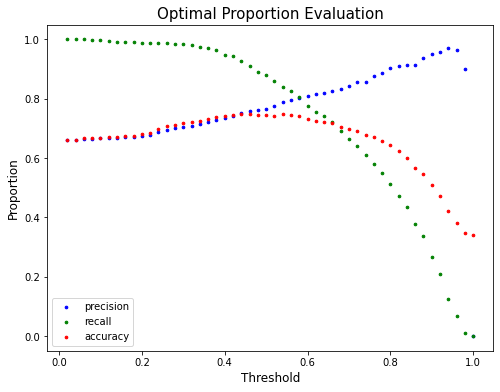

In [ ]:
# Precison-Recall-Threshold Curve
k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_sel_results['threshold'], df_sel_results['precision'], color = 'b', s = 7)
ax1.scatter(df_sel_results['threshold'], df_sel_results['recall']   , color = 'g', s = 7)
ax1.scatter(df_sel_results['threshold'], df_sel_results['accuracy']   , color = 'r', s = 7)
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)
plt.legend(['precision', 'recall', 'accuracy'])
plt.title("Optimal Proportion Evaluation", fontsize = 15)

[Text(0.5, 0, 'Threshold'), Text(0, 0.5, 'F1 Score'), (0.0, 1.02), (0.0, 1.0)]

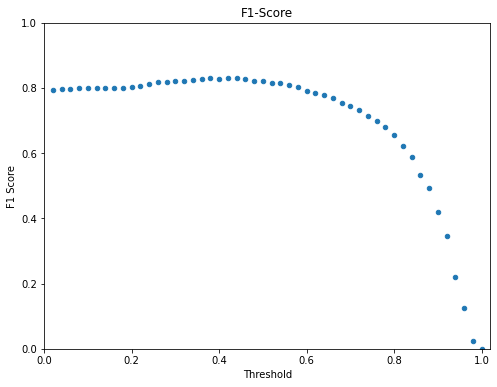

In [ ]:
# F1-Score Curve
grap = df_sel_results[df_sel_results["threshold"] > 0.0].plot(kind="scatter",
                                                              x="threshold",
                                                              y="f1_score",
                                                              grid=False,
                                                              legend=True,
                                                              title="F1-Score",
                                                              figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))

Para determinar o valor de threshold buscaremos um compromisso entre **acurácia** e **precisão**. O motivo de escolher o critério **precisão** é que não queremos classificar vinhos ruins como bons, seria prejudicial para a vínicola, enólogo e/ou sommelir. Esse é o mesmo caso de inspeção de peças por fábricas, não queremos peças ruins classificadas como boas.

Contudo, **priorizar a apenas a precisão gera um impacto negativo na acurácia**. Existe um leve plato de acurácia para limiares entre 0.4 e 0.64. E quanto maior o limiar melhor a precisão, adotaremos um limiar de 0.64

In [ ]:
# Cria o predict usando um novo threshold
y_pred_tsh = np.where(y_proba_test[:,1] >= 0.58, 1, 0)

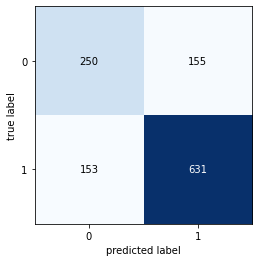

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_tsh)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
# Print do classification report
print(classification_report(y_test, y_pred_tsh))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       405
           1       0.80      0.80      0.80       784

    accuracy                           0.74      1189
   macro avg       0.71      0.71      0.71      1189
weighted avg       0.74      0.74      0.74      1189



Com esse limiar a acurácia em 2.7% em 11.6%

## 3.3 Base de dados Full

A regressão será realizada aproveitando os atributos selecionados na regressão linear.

In [ ]:
# Speara os dados em X e Y
X = df.drop(['quality', 'label'], axis=1)
dict_label = {'ruim': 0, 'bom':1}
y = df['label'].map(dict_label)

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
atributos = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

In [ ]:
# Filtrando os dados de treino e teste
X_sel_train = X_train[atributos]
X_sel_test = X_test[atributos]

In [ ]:
# Instancia a normalização e normaliza os dados
scaler = StandardScaler()
X_sel_train_std = scaler.fit_transform(X_sel_train)
X_sel_test_std = scaler.transform(X_sel_test)

In [ ]:
# Instancia o modelo
model = LogisticRegression(max_iter = 1000)

In [ ]:
# Fit do modelo
model.fit(X_sel_train_std, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Gera o predict
y_pred = model.predict(X_sel_test_std)

In [ ]:
type(y_test), type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

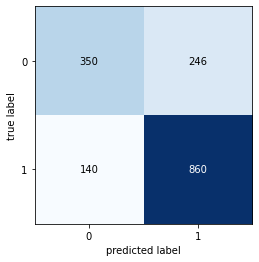

In [ ]:
# gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
# Print do Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.59      0.64       596
           1       0.78      0.86      0.82      1000

    accuracy                           0.76      1596
   macro avg       0.75      0.72      0.73      1596
weighted avg       0.75      0.76      0.75      1596



### 3.2.1 Avaliando Limiar de Corte

In [ ]:
y_proba_test = model.predict_proba(X_sel_test_std)
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

In [ ]:
# Parâmetros para o Looping
threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [ ]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['label'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['label'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['label'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['label'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    #print('(tsh:' + str(i_threshold) + str(TN) + ', ' + str(FN) + ', ' + str(TP) + ', ' + str(TP) + ')')
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_sel_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [ ]:
df_sel_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,596,1000,0.6266,1.000,0.6266,0.7704
1,0.04,0,0,596,1000,0.6266,1.000,0.6266,0.7704
2,0.06,3,0,593,1000,0.6277,1.000,0.6284,0.7713
3,0.08,7,0,589,1000,0.6293,1.000,0.6310,0.7725
4,0.10,13,0,583,1000,0.6317,1.000,0.6347,0.7743
5,0.12,24,1,572,999,0.6359,0.999,0.6410,0.7771
6,0.14,35,3,561,997,0.6399,0.997,0.6466,0.7795
7,0.16,44,4,552,996,0.6434,0.996,0.6516,0.7818
8,0.18,63,9,533,991,0.6503,0.991,0.6604,0.7853
9,0.20,76,10,520,990,0.6556,0.990,0.6679,0.7888


Text(0.5, 1.0, 'Optimal Proportion Evaluation')

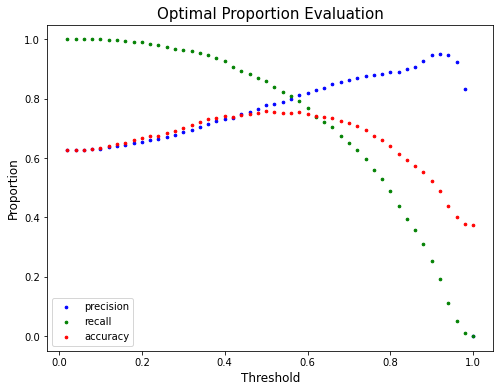

In [ ]:
# Precison-Recall-Threshold Curve
k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_sel_results['threshold'], df_sel_results['precision'], color = 'b', s = 7)
ax1.scatter(df_sel_results['threshold'], df_sel_results['recall']   , color = 'g', s = 7)
ax1.scatter(df_sel_results['threshold'], df_sel_results['accuracy']   , color = 'r', s = 7)
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)
plt.legend(['precision', 'recall', 'accuracy'])
plt.title("Optimal Proportion Evaluation", fontsize = 15)

[Text(0.5, 0, 'Threshold'), Text(0, 0.5, 'F1 Score'), (0.0, 1.02), (0.0, 1.0)]

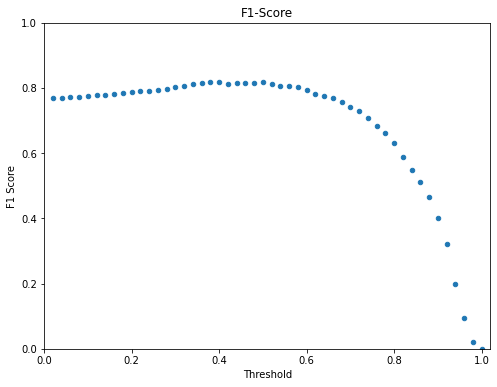

In [ ]:
# F1-Score Curve
grap = df_sel_results[df_sel_results["threshold"] > 0.0].plot(kind="scatter",
                                                              x="threshold",
                                                              y="f1_score",
                                                              grid=False,
                                                              legend=True,
                                                              title="F1-Score",
                                                              figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))

Para determinar o valor de threshold buscaremos um compromisso entre **acurácia** e **precisão**. O motivo de escolher o critério **precisão** é que não queremos classificar vinhos ruins como bons, seria prejudicial para a vínicola, enólogo e/ou sommelir. Esse é o mesmo caso de inspeção de peças por fábricas, não queremos peças ruins classificadas como boas.

Contudo, **priorizar a apenas a precisão gera um impacto negativo na acurácia**. Existe um leve plato de acurácia para limiares entre 0.4 e 0.64. E quanto maior o limiar melhor a precisão, adotaremos um limiar de 0.64

In [ ]:
# Cria o predict usando um novo threshold
y_pred_tsh = np.where(y_proba_test[:,1] >= 0.58, 1, 0)

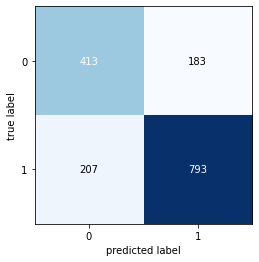

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_tsh)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
# Print do classification report
print(classification_report(y_test, y_pred_tsh))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       596
           1       0.81      0.79      0.80      1000

    accuracy                           0.76      1596
   macro avg       0.74      0.74      0.74      1596
weighted avg       0.76      0.76      0.76      1596



Com esse limiar a acurácia em 2.7% em 11.6%